# Игры — Анализ рекламных источников

Ссылка на презентацию: https://drive.google.com/file/d/1WbdGbjhUe66HzJXkg7_K0d8-ne0NSl4-/view?usp=sharing

Заказчик - менеджер игры "Космические братья", 

**Задача**: проанализировать поведение игроков в зависимости от источника перехода.

Датасет содержит данные о событиях, совершенных в мобильной игре «Космические братья». В ней пользователи строят свою космическую программу и пытаются преуспеть в нелёгком деле колонизации галактики.

Основная монетизация игры — только планируется. Но предполагается, что в приложении будет происходить показ рекламы на экране с выбором типа объекта для постройки.

В датасете представлены данные по игре пользователей на первом уровне. Завершение первого уровня требует от игрока выполнения одного из двух условий:
- Победа над первым врагом
- Реализация проекта - разработка орбитальной сборки спутников

В датасете содержатся данные первых пользователей приложения — когорты пользователей, которые начали пользоваться приложением в период с 4 по 10 мая включительно.

**Шаг 1. Выгрузка файлов. Изучение общей информации о датафреймах.**

**Шаг 2. Предобработка данных:**
- Исследование пропущенные значения, обработка пропусков при необходимости;
- Проверка соответствия типов;
- Исследование дубликатов, их удаление в случае наличия.

**Шаг 3. Исследовательский анализ данных:**
- Анализ временного промежутка: определить минимальную и максиамльную даты привлечения пользователей и действий. Проверить наличие данных на всем временном интервале. Как изменялось количество действий и пользователей по дням?
- Анализ рекламной активности: с каких источников приходит больше пользователей? Рассчитать стоимость привлечения пользователя для каждого канала.
- Анализ поведения пользователей: какова доля игроков, проходящих первый уровень? Каким способом игроки чаще заканчивают уровень? Сколько в среднем дней требуется пользователю для прохождения первого уровня? Сколько в среднем игрок строит зданий? Какие здания он строит? Какая доля игровков остается на уровне после завершения проекта?

**Шаг 4. Составление и анализ профилей пользователей.**

Для пользователя с каждого канала определить следующее:
- Доля игроков, прошедших первый уровень;
- Способ прохождения уровня;
- Время прохождения;
- Количество и тип построенных зданий;
- Доля игроков, не перешедших на следующий уровень после завершения проекта.

**Шаг 5. Проверка гипотез:**
- Время завершения уровня различается в зависимости способа прохождения;
- Количество построенных зданией различается в зависимости от способа прохождения;

**Шаг 6. Выводы и рекомендации.**

На основе проведенного анализа сделать выводы о потенциальной прибыльности каждого канала привлечения с учетом предполагаемой модели монетизации. Учитывая составленные профиля поведения пользователей, предложить альтернативные способы монетизации заказчику.

## Выгрузка файлов. Изучение общей информации о датафреймах.

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
from datetime import datetime
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# отключение предупреждений
warnings.filterwarnings("ignore")

In [2]:
# функция для чтения файлов
def read_files(url):
    url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
    return(pd.read_csv(url))

In [3]:
# чтение файлов
ga = read_files('https://drive.google.com/file/d/1zLECsMC5vd8Zx4A3aB8y-acRxJrSfStK/view?usp=sharing')
us = read_files('https://drive.google.com/file/d/10g84BvU5yHtJI9qC3nSg5hx6FE8G4FUU/view?usp=sharing')
ac = read_files('https://drive.google.com/file/d/1lHZ9xXZbixiAYcK9gWk3Y8nz-eEPr8WC/view?usp=sharing')

In [4]:
# настройки графиков
sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

# увеличение максимального длины отображаемых значений таблицы
pd.set_option("max_colwidth", 300)

## Предобработка данных

- Исследование пропущенных значения, обработка пропусков при необходимости;
- Проверка соответствия типов;
- Исследование дубликатов, их удаление в случае наличия

In [5]:
def first_look(df):
    '''Функция для просмотра основной информации о таблице'''
    print('Первые 5 строк таблицы:')
    display(df.head())
    print('*'*50)
    print('Информация о таблице:')
    df.info()
    print('*'*50)
    display(df.describe())
    print('*'*50)
    print('Количество строк и столбцов:')
    print(df.shape)
    print('*'*50)
    print('Количество пропусков:')
    if df.isna().sum().sum()==0:
        print('пропусков нет')
    else:
        print(df.isna().sum())
    print('Количество дубликатов:')
    if df.duplicated().sum()==0:
        print('дубликатов нет')
    else:
        print(df.duplicated().sum())

In [6]:
first_look(ga)

Первые 5 строк таблицы:


,event_datetime,event,building_type,user_id,project_type
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN


**************************************************
Информация о таблице:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   event_datetime  135640 non-null  object
 1   event           135640 non-null  object
 2   building_type   127957 non-null  object
 3   user_id         135640 non-null  object
 4   project_type    1866 non-null    object
dtypes: object(5)
memory usage: 5.2+ MB
**************************************************


,event_datetime,event,building_type,user_id,project_type
count,135640,135640,127957,135640,1866
unique,128790,3,3,13576,1
top,2020-05-08 21:56:19,building,spaceport,ff841992-d93b-462e-bc6e-18c24a514f36,satellite_orbital_assembly
freq,4,127957,59325,22,1866


**************************************************
Количество строк и столбцов:
(135640, 5)
**************************************************
Количество пропусков:
event_datetime         0
event                  0
building_type       7683
user_id                0
project_type      133774
dtype: int64
Количество дубликатов:
1


- В датафрейме обнаружен один дубликат. Удалим его;
- Тип столбца с датой и временем - object. Приведем к нужному типу;
- В данных имеются пропуски в стобцах building_type и project_type. Эти пропуски обоснованны: если событие не является постройкой здания, то building_type будет пуст, а если событие не является завершением проекта, то пропуск будет в project_type.

In [7]:
# удалим дубликаты
ga = ga.drop_duplicates().reset_index(drop=True)

In [8]:
# приведем тип event_datetime к datetime
ga['event_datetime'] = ga['event_datetime'].astype('datetime64[s]')

In [9]:
# просмотрим датафрейм после преобразований
first_look(ga)

Первые 5 строк таблицы:


,event_datetime,event,building_type,user_id,project_type
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN


**************************************************
Информация о таблице:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135639 entries, 0 to 135638
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   event_datetime  135639 non-null  datetime64[ns]
 1   event           135639 non-null  object        
 2   building_type   127956 non-null  object        
 3   user_id         135639 non-null  object        
 4   project_type    1866 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 5.2+ MB
**************************************************


,event_datetime,event,building_type,user_id,project_type
count,135639,135639,127956,135639,1866
unique,128790,3,3,13576,1
top,2020-05-10 03:08:18,building,spaceport,ff841992-d93b-462e-bc6e-18c24a514f36,satellite_orbital_assembly
freq,4,127956,59325,22,1866
first,2020-05-04 00:00:01,NaN,NaN,NaN,NaN
last,2020-06-05 12:32:49,NaN,NaN,NaN,NaN


**************************************************
Количество строк и столбцов:
(135639, 5)
**************************************************
Количество пропусков:
event_datetime         0
event                  0
building_type       7683
user_id                0
project_type      133773
dtype: int64
Количество дубликатов:
дубликатов нет


In [10]:
first_look(us)

Первые 5 строк таблицы:


,user_id,source
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads
1,00151b4f-ba38-44a8-a650-d7cf130a0105,yandex_direct
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,youtube_channel_reklama
3,001d39dc-366c-4021-9604-6a3b9ff01e25,instagram_new_adverts
4,002f508f-67b6-479f-814b-b05f00d4e995,facebook_ads


**************************************************
Информация о таблице:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13576 entries, 0 to 13575
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  13576 non-null  object
 1   source   13576 non-null  object
dtypes: object(2)
memory usage: 212.2+ KB
**************************************************


,user_id,source
count,13576,13576
unique,13576,4
top,0d78e032-4a45-48b8-9b9d-0c0cb5177cc1,yandex_direct
freq,1,4817


**************************************************
Количество строк и столбцов:
(13576, 2)
**************************************************
Количество пропусков:
пропусков нет
Количество дубликатов:
дубликатов нет


In [11]:
first_look(ac)

Первые 5 строк таблицы:


,source,day,cost
0,facebook_ads,2020-05-03,935.882786
1,facebook_ads,2020-05-04,548.354480
2,facebook_ads,2020-05-05,260.185754
3,facebook_ads,2020-05-06,177.982200
4,facebook_ads,2020-05-07,111.766796


**************************************************
Информация о таблице:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   source  28 non-null     object 
 1   day     28 non-null     object 
 2   cost    28 non-null     float64
dtypes: float64(1), object(2)
memory usage: 800.0+ bytes
**************************************************


,cost
count,28.000000
mean,271.556321
std,286.867650
min,23.314669
25%,66.747365
50%,160.056443
75%,349.034473
max,969.139394


**************************************************
Количество строк и столбцов:
(28, 3)
**************************************************
Количество пропусков:
пропусков нет
Количество дубликатов:
дубликатов нет


## Исследовательский анализ данных

### Анализ временного промежутка: определить минимальную и максимальную даты привлечения пользователей и действий. Проверить наличие данных на всем временном интервале. Как изменялось количество действий и пользователей по дням?

In [12]:
# приведем day к формату datetime
ac['day'] = pd.to_datetime(ac['day'])

In [13]:
# просмотрим временные рамки
print(f'Временные рамки: начало - {ga.event_datetime.min()}, конец - {ga.event_datetime.max()}')

Временные рамки: начало - 2020-05-04 00:00:01, конец - 2020-06-05 12:32:49


count                  135639
unique                 128790
top       2020-05-10 03:08:18
freq                        4
first     2020-05-04 00:00:01
last      2020-06-05 12:32:49
Name: event_datetime, dtype: object


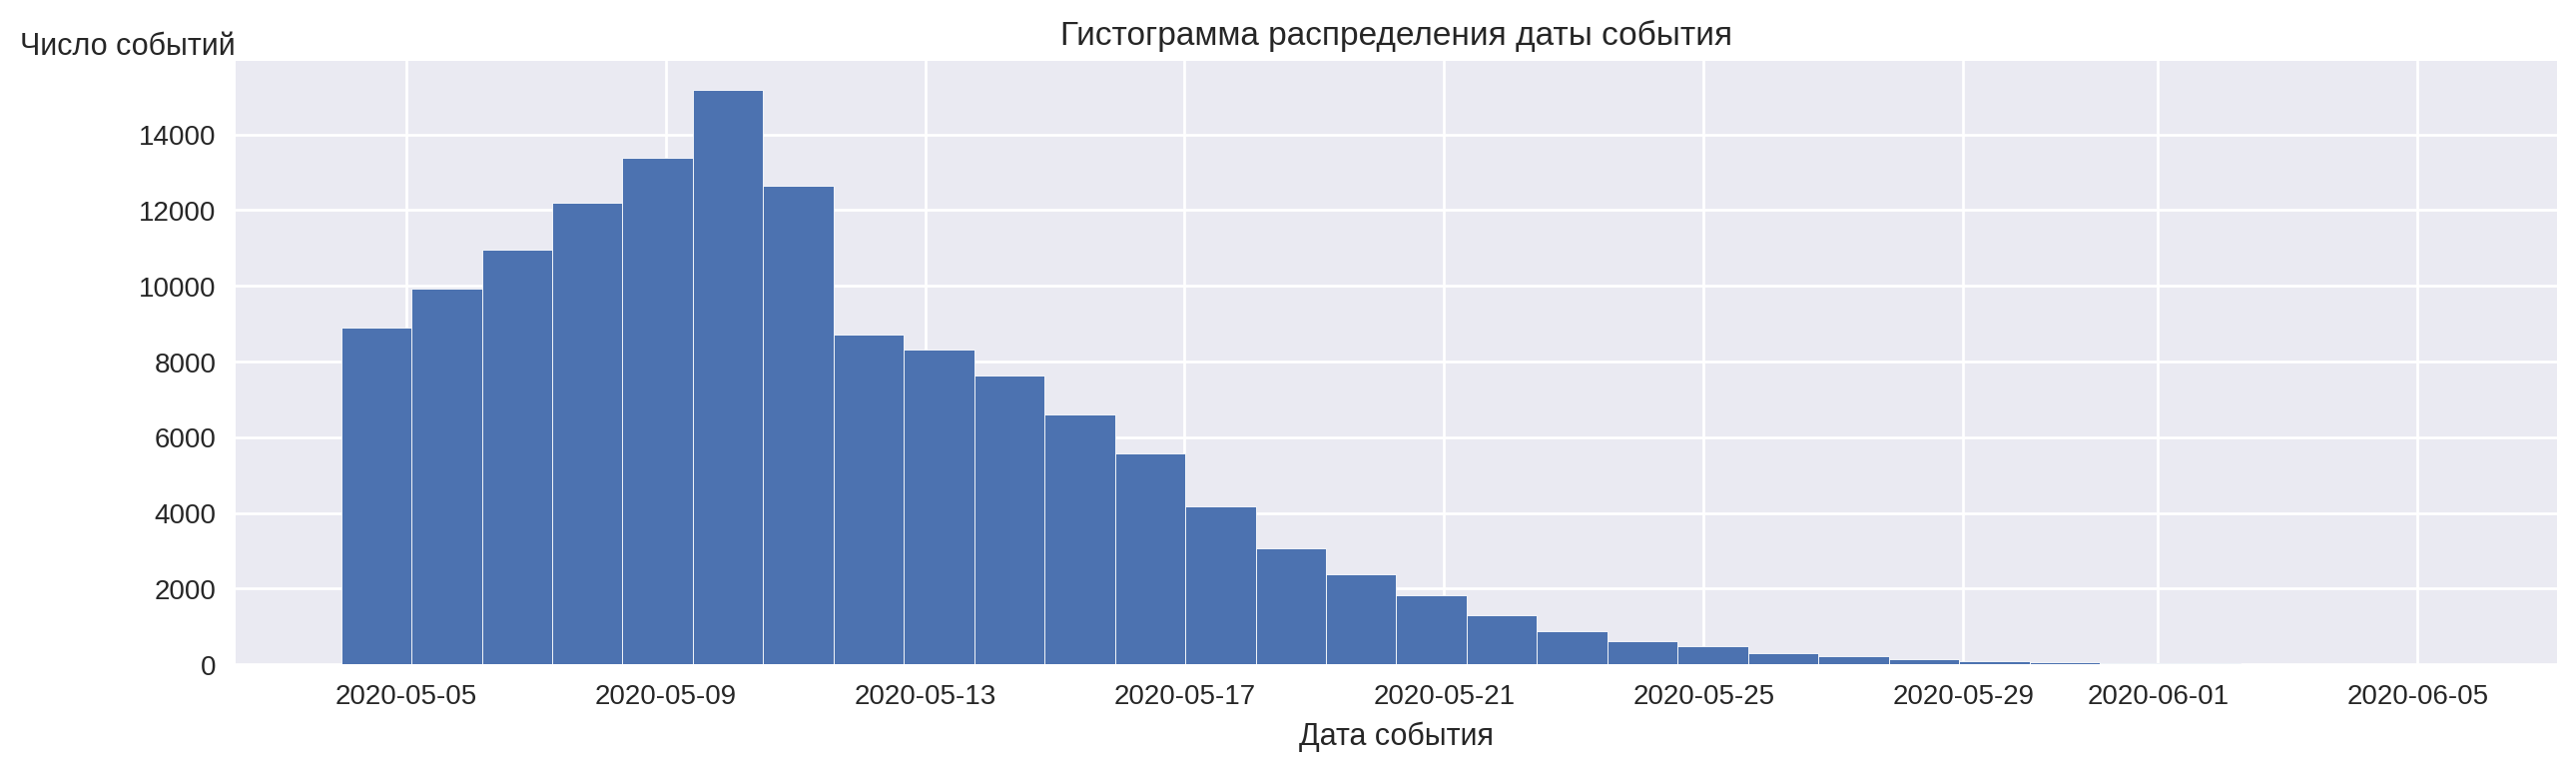

In [14]:
# построим гистограмму распределения по времени, чтобы проверить, все ли данные актуальны
print(ga['event_datetime'].describe())
plt.figure(figsize=(15,4))
with plt.style.context('seaborn'):
    ga['event_datetime'].hist(bins=30)
    plt.title('Гистограмма распределения даты события')
    plt.ylabel('Число событий', rotation=0, position = (0,1))
    plt.xlabel('Дата события')
    plt.show()

По гистограмме видно, что, начиная с 5 мая 2020, количество событий возростало, пик событий пришелся на 10 мая, после чего было снижение активности вплоть до 29 мая. После этой даты количество действий очень невелико.

In [15]:
# создадим столбец event_date
ga['event_date'] = pd.to_datetime(ga['event_datetime']).dt.date

In [16]:
# посмотрим, как изменялось количество пользователей с каждым днем
ga.groupby('event_date')[['user_id']].nunique().reset_index()

,event_date,user_id
0,2020-05-04,5860
1,2020-05-05,6382
2,2020-05-06,6854
3,2020-05-07,7384
4,2020-05-08,7891
5,2020-05-09,8394
6,2020-05-10,9219
7,2020-05-11,5995
8,2020-05-12,5776
9,2020-05-13,5632


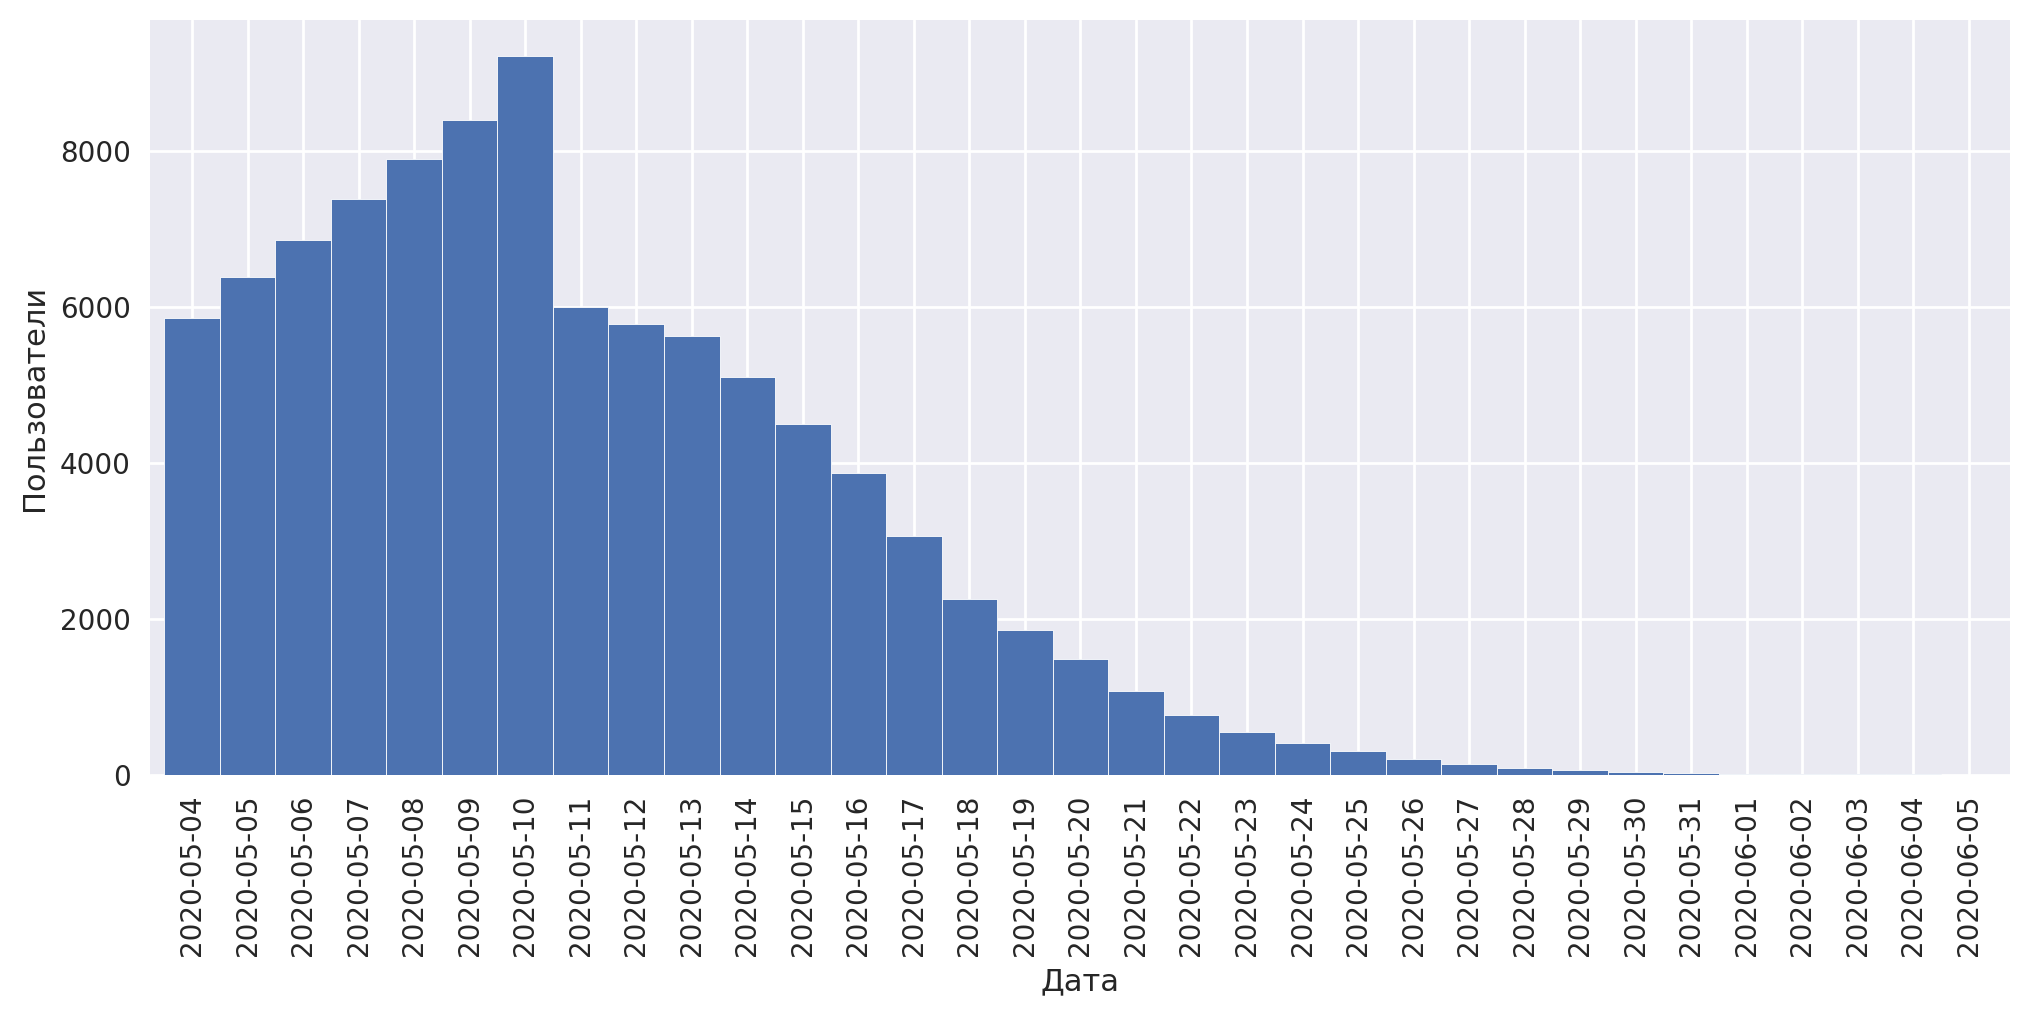

In [17]:
# построим график
with plt.style.context('seaborn'):
    ax = ga.groupby('event_date')[['user_id']].nunique().reset_index()\
    .plot(kind='bar', stacked=True, width=1, x='event_date', figsize=(12, 5), grid=True, legend=False)
    ax.set_xlabel('Дата')
    ax.set_ylabel('Пользователи')

С количеством пользователей ситуация такая же, как с событиями: рост до 10 мая, затем падение, практически полное отсутствие после 29 мая.

### Анализ рекламной активности: с каких источников приходит больше пользователей? Рассчитать стоимость привлечения пользователя для каждого канала.

In [18]:
# посмотрим, с каких источников приходит сколько пользователей
us.groupby('source').count()

,user_id
source,
facebook_ads,2726
instagram_new_adverts,3347
yandex_direct,4817
youtube_channel_reklama,2686


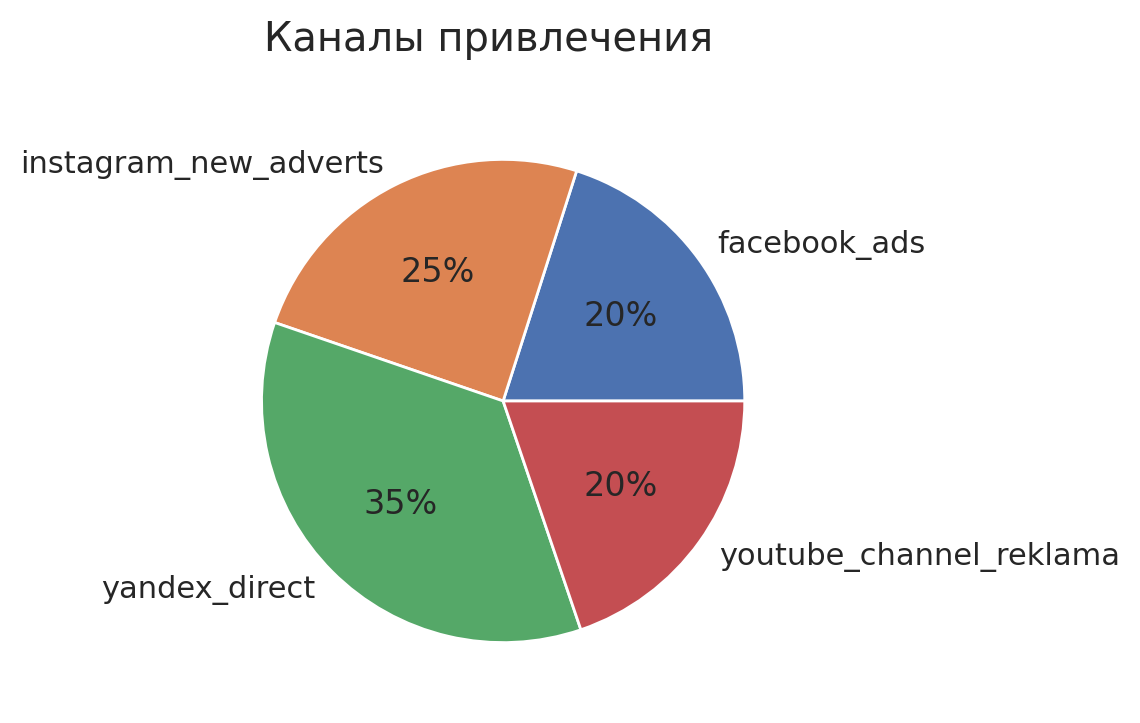

In [19]:
# построим график
us.groupby('source').count().plot(kind='pie', subplots=True, legend= False, autopct='%1.0f%%', title='Каналы привлечения')
plt.axes().set_ylabel('');

In [20]:
# посмотрим, сколько денег было суммарно потрачено на рекламу
ac.groupby('source').sum()

,cost
source,
facebook_ads,2140.904643
instagram_new_adverts,2161.441691
yandex_direct,2233.111449
youtube_channel_reklama,1068.119204


In [21]:
# создадим таблицу ad, в которой будет тип источника, количество пользователей,
# стоимость рекламы и стоимость привлечения одного пользователя
ad = us.groupby('source').count().merge(ac.groupby('source').sum(), on = 'source')
ad['cost_for_one'] = round(ad['cost']/ad['user_id'], 2)
ad

,user_id,cost,cost_for_one
source,,,
facebook_ads,2726,2140.904643,0.79
instagram_new_adverts,3347,2161.441691,0.65
yandex_direct,4817,2233.111449,0.46
youtube_channel_reklama,2686,1068.119204,0.40


**Вывод:** наибольшее количество пользователей приходит с канала yandex_direct. Наименьшие затраты на рекламу были у youtube_channel_reklama, и у этого же источника наиболее низкая стоимость привлечения одного пользователя.

### Анализ поведения пользователей: какова доля игроков, проходящих первый уровень? Каким способом игроки чаще заканчивают уровень? Сколько в среднем дней требуется пользователю для прохождения первого уровня? Сколько в среднем игрок строит зданий? Какие здания он строит? Какая доля игроков остается на уровне после завершения проекта?

In [22]:
# посмотрим, какой процент игроков проходит первый уровень
share = ga[ga['event']=='finished_stage_1']['user_id'].count()/ga['user_id'].nunique()
print(f'Доля игроков, проходящих первый уровень: {share:.2%}')

Доля игроков, проходящих первый уровень: 42.85%


In [23]:
# посмотрим, какова доля игроков, завершивший первый уровень через реализацию проекта
share = ga[ga['project_type']=='satellite_orbital_assembly']['user_id'].count()/ga[ga['event']=='finished_stage_1']['user_id'].count()
print(f'Доля игроков, завершивших первый уровень через реализацию проекта: {share:.2%}')

Доля игроков, завершивших первый уровень через реализацию проекта: 32.08%


In [24]:
# создадим таблицу с датами первых событий для каждого пользователя
first_event_table = pd.pivot_table(data=ga, values= 'event_date', index='user_id', aggfunc=np.min)\
                                    .rename(columns={'event_date': 'first_event'})
first_event_table

,first_event
user_id,
0001f83c-c6ac-4621-b7f0-8a28b283ac30,2020-05-06
00151b4f-ba38-44a8-a650-d7cf130a0105,2020-05-06
001aaea6-3d14-43f1-8ca8-7f48820f17aa,2020-05-05
001d39dc-366c-4021-9604-6a3b9ff01e25,2020-05-05
002f508f-67b6-479f-814b-b05f00d4e995,2020-05-05
...,...
ffef4fed-164c-40e1-bde1-3980f76d0fb5,2020-05-04
fffab3da-da0e-4e30-ae62-10d0a2e24a4e,2020-05-04
fffb626c-5ab6-47c9-8113-2062a2f18494,2020-05-04


In [25]:
# создадим таблицу с датами прохождения первого уровня для каждого пользователя
finished_stage_table = pd.pivot_table(data=ga.query('event == "finished_stage_1"'), 
                                      values= 'event_date', index='user_id', aggfunc=np.min)\
                                     .rename(columns={'event_date': 'finished_stage'})
finished_stage_table

,finished_stage
user_id,
001d39dc-366c-4021-9604-6a3b9ff01e25,2020-05-12
003ee7e8-6356-4286-a715-62f22a18d2a1,2020-05-17
004074f8-251a-4776-922c-8348dca1a2f6,2020-05-16
00464e5e-28ed-4be6-bf44-517ef7b3937b,2020-05-15
0056c007-c082-43cc-bdef-afc49bca4cb9,2020-05-16
...,...
ffd002f3-3545-423e-8dba-0c6a2d48a3aa,2020-05-19
ffe810f4-1a1f-464b-924d-6f120b0cb8df,2020-05-18
ffef4fed-164c-40e1-bde1-3980f76d0fb5,2020-05-11


In [26]:
# склеим таблицы
days_to_finish_table = finished_stage_table.merge(first_event_table, on='user_id', how='left')
days_to_finish_table

,finished_stage,first_event
user_id,,
001d39dc-366c-4021-9604-6a3b9ff01e25,2020-05-12,2020-05-05
003ee7e8-6356-4286-a715-62f22a18d2a1,2020-05-17,2020-05-05
004074f8-251a-4776-922c-8348dca1a2f6,2020-05-16,2020-05-04
00464e5e-28ed-4be6-bf44-517ef7b3937b,2020-05-15,2020-05-04
0056c007-c082-43cc-bdef-afc49bca4cb9,2020-05-16,2020-05-10
...,...,...
ffd002f3-3545-423e-8dba-0c6a2d48a3aa,2020-05-19,2020-05-06
ffe810f4-1a1f-464b-924d-6f120b0cb8df,2020-05-18,2020-05-04
ffef4fed-164c-40e1-bde1-3980f76d0fb5,2020-05-11,2020-05-04


In [27]:
# добавим столбец days_to_finish, в котором рассчитаем время, которое потреболось пользователям, чтобы пройти первый уровень
days_to_finish_table['days_to_finish'] = (days_to_finish_table['finished_stage'] - days_to_finish_table['first_event']).dt.days
days_to_finish_table

,finished_stage,first_event,days_to_finish
user_id,,,
001d39dc-366c-4021-9604-6a3b9ff01e25,2020-05-12,2020-05-05,7
003ee7e8-6356-4286-a715-62f22a18d2a1,2020-05-17,2020-05-05,12
004074f8-251a-4776-922c-8348dca1a2f6,2020-05-16,2020-05-04,12
00464e5e-28ed-4be6-bf44-517ef7b3937b,2020-05-15,2020-05-04,11
0056c007-c082-43cc-bdef-afc49bca4cb9,2020-05-16,2020-05-10,6
...,...,...,...
ffd002f3-3545-423e-8dba-0c6a2d48a3aa,2020-05-19,2020-05-06,13
ffe810f4-1a1f-464b-924d-6f120b0cb8df,2020-05-18,2020-05-04,14
ffef4fed-164c-40e1-bde1-3980f76d0fb5,2020-05-11,2020-05-04,7


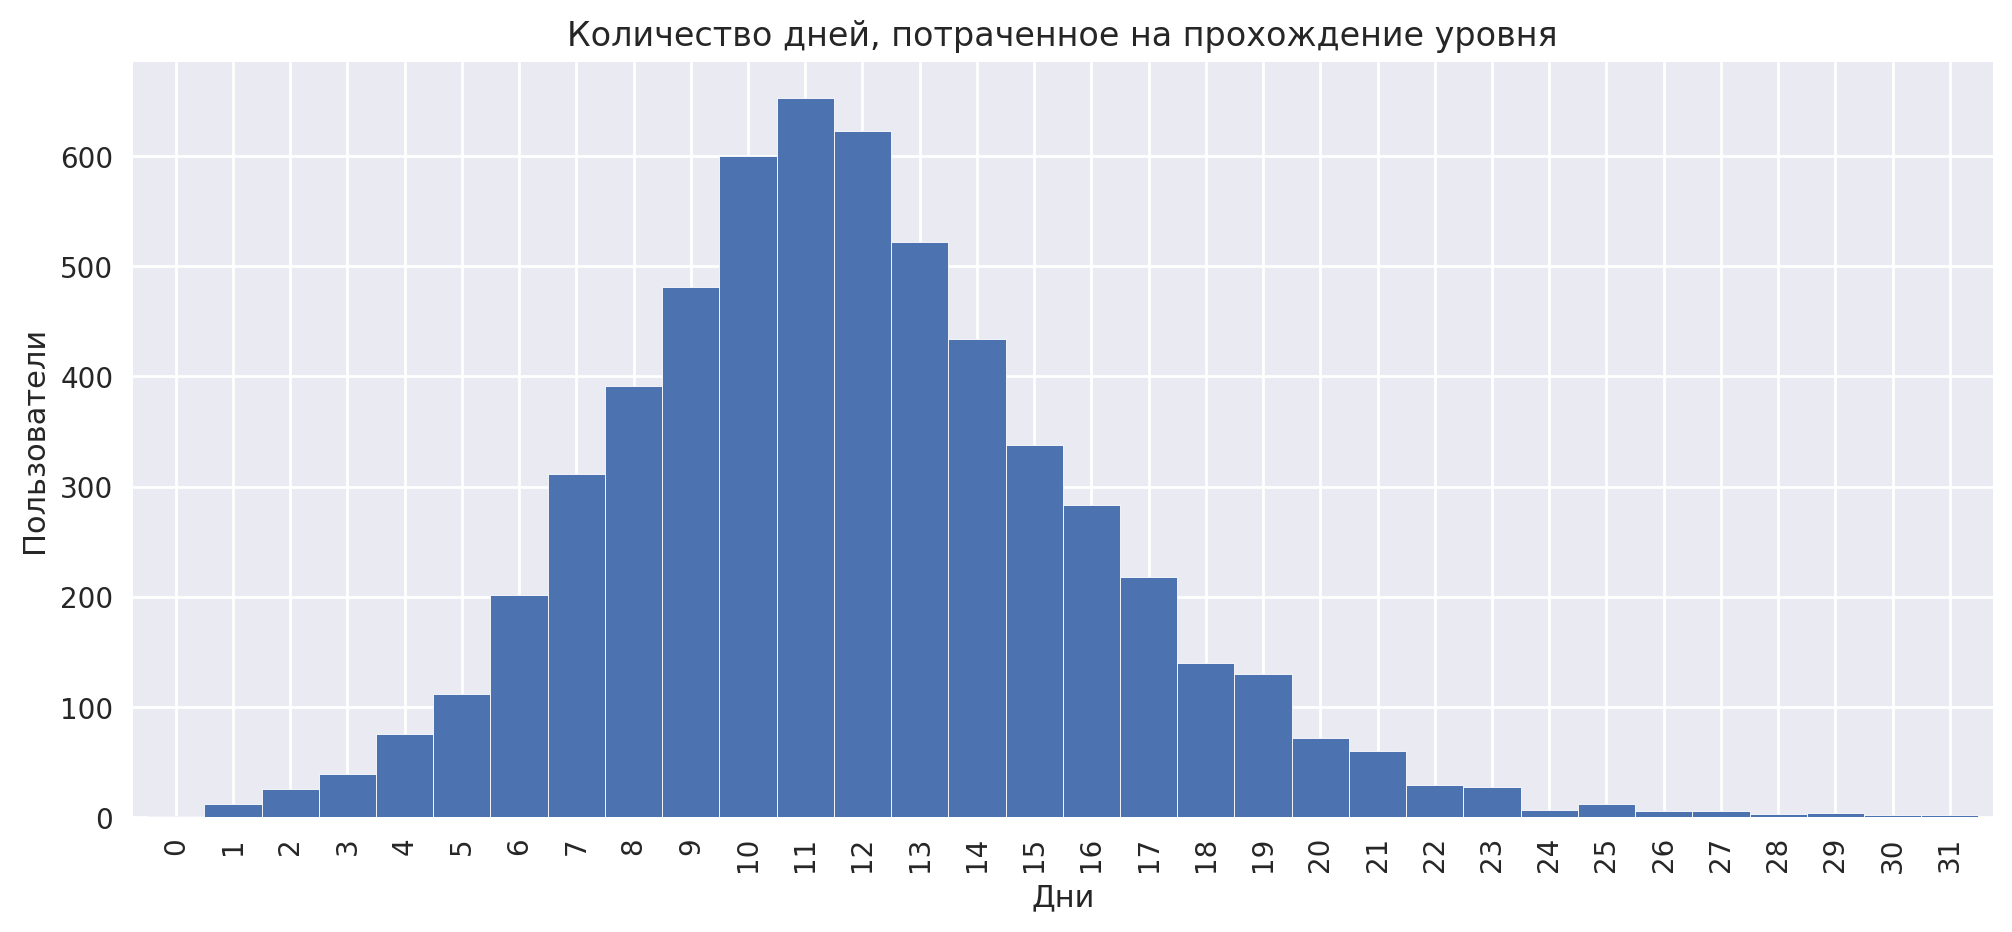

In [28]:
# построим график распределения
with plt.style.context('seaborn'):
    ax = days_to_finish_table.groupby('days_to_finish')['finished_stage'].count().to_frame()\
    .plot(kind='bar', figsize = (12, 5), stacked=True, width=1, legend=False, title = 'Количество дней, потраченное на прохождение уровня')
    ax.set_xlabel("Дни")
    ax.set_ylabel("Пользователи")

Получили график нормального распределения. Обычно игрокам требуется 6-17 дней, чтобы пройти первый уровень. Чаще всего пользователи завершают игру через 11 дней.

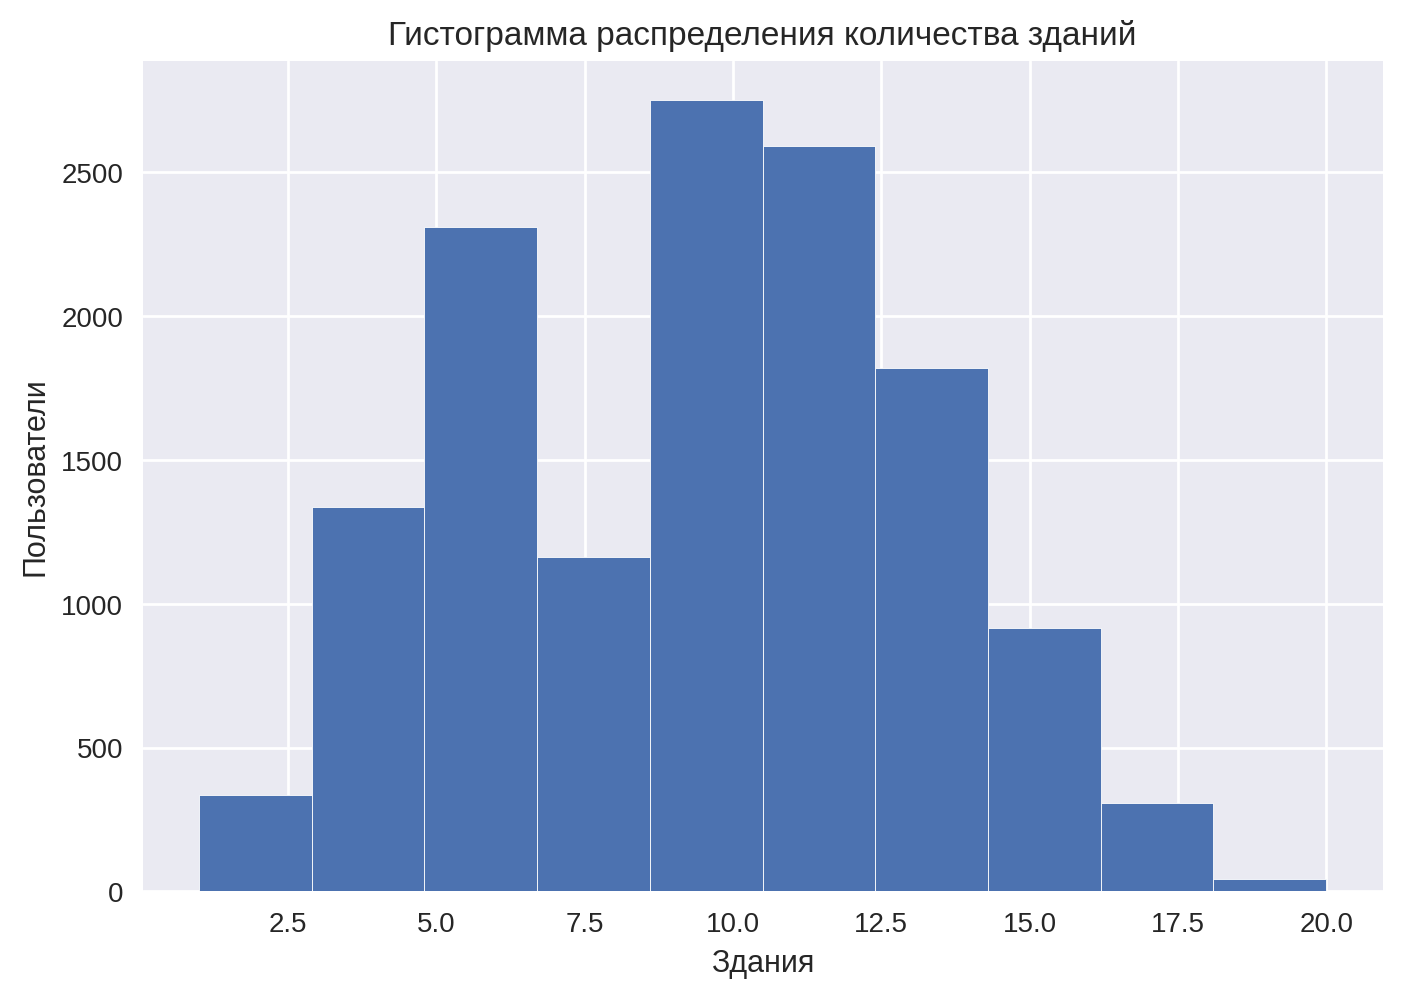

In [29]:
# построим таблицу с количеством зданий, которые строят игроки
with plt.style.context('seaborn'):
    ga[ga['event']=='building'].groupby('user_id')['event'].count().to_frame().hist()
    plt.title('Гистограмма распределения количества зданий')
    plt.ylabel('Пользователи')
    plt.xlabel('Здания')
    plt.show()

Игроки обычно строят от 5 до 15 зданий, медиана - 10.

In [30]:
# построим, какие здания игроки строят чаще
ga[ga['event']=='building'].groupby('building_type')['user_id'].count().to_frame()

,user_id
building_type,
assembly_shop,54494
research_center,14137
spaceport,59325


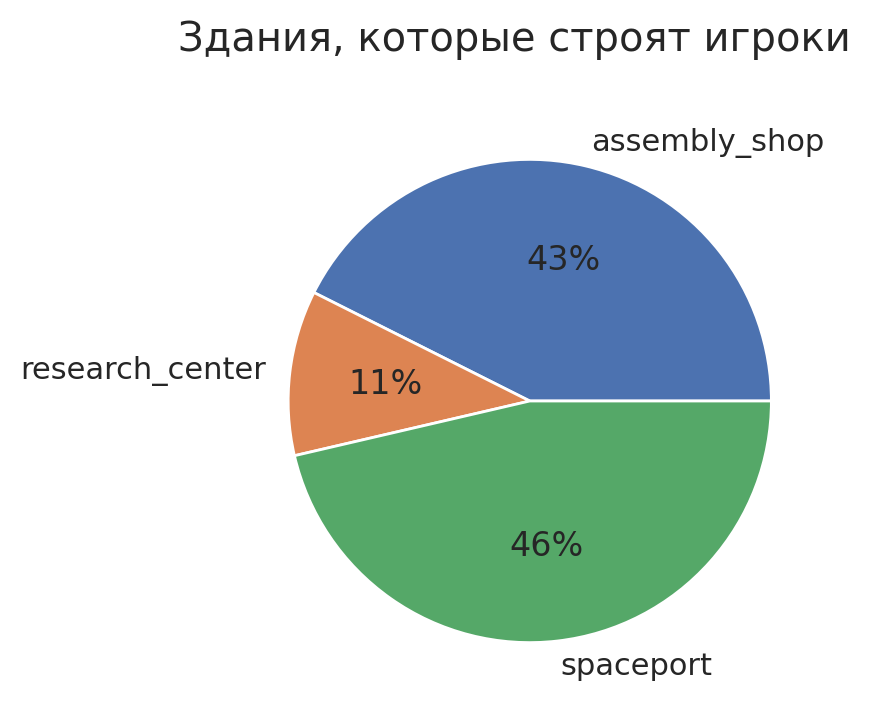

In [31]:
# построим график
ga[ga['event']=='building'].groupby('building_type')['user_id'].count().to_frame().plot.pie(subplots=True, legend= False, autopct='%1.0f%%', title='Здания, которые строят игроки')
plt.axes().set_ylabel('');

In [32]:
# создадим список с пользователями, которые закончили игру через проект
users = ga.query('project_type == "satellite_orbital_assembly"')['user_id'].tolist()

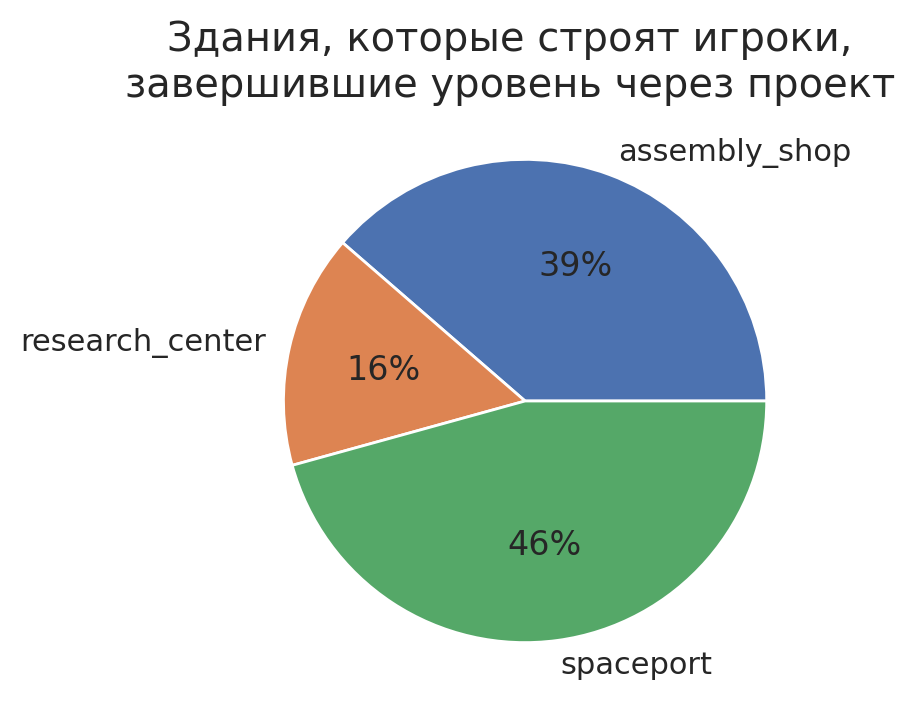

In [33]:
# построим график для пользователей, которые закончили игру через проект
ga.query('event== "building" & user_id in @users').groupby('building_type')['user_id'].count().to_frame()\
        .plot.pie(subplots=True, legend= False, autopct='%1.0f%%', title='Здания, которые строят игроки,\nзавершившие уровень через проект')
plt.axes().set_ylabel('');

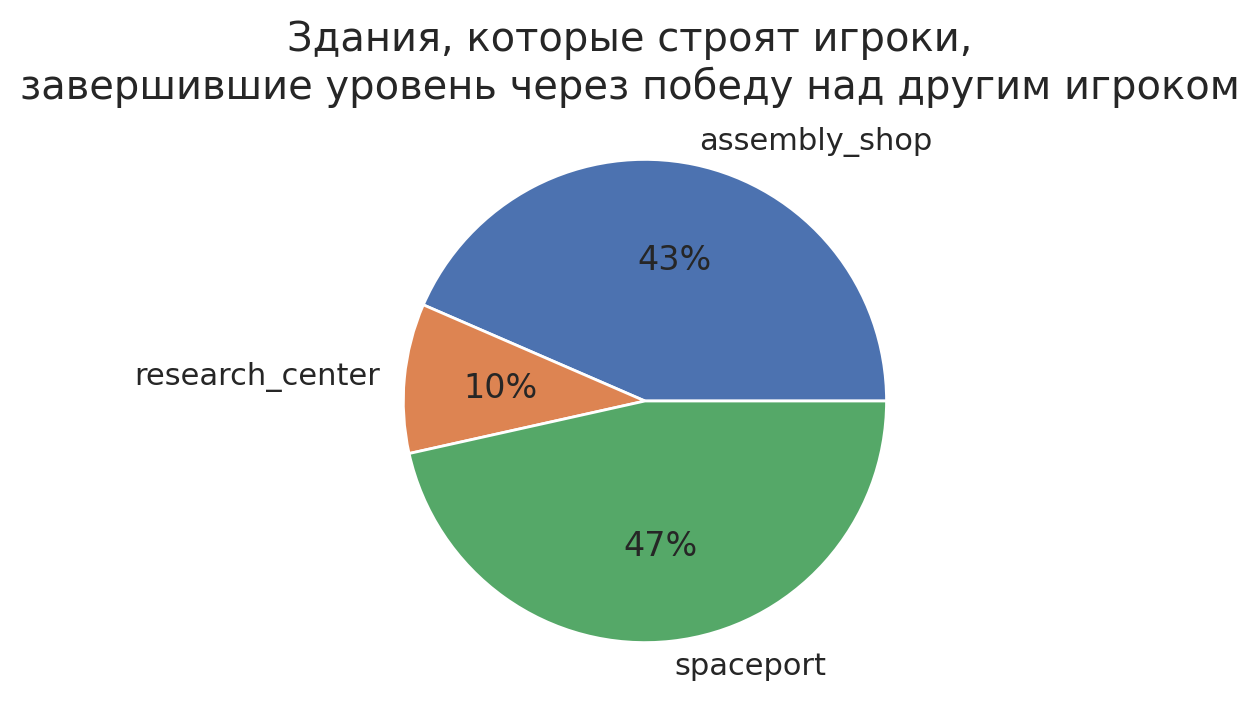

In [34]:
# построим график для пользователей, которые закончили игру через победу над другим игроком
ga.query('event== "building" & user_id not in @users').groupby('building_type')['user_id'].count().to_frame()\
        .plot.pie(subplots=True, legend= False, autopct='%1.0f%%', title='Здания, которые строят игроки,\nзавершившие уровень через победу над другим игроком')
plt.axes().set_ylabel('');

Наиболее популярное здание - spaceport. Чуть реже стоится assembly_shop. Самый редкий гость - research_center. Игроки, заканчивающие игру через проект, строят research_center в 1,6 раз чаще, чем игроки, которые заканчивают игру через победу над другим игроком.

In [35]:
# создадим таблицу, в которую занесем последние действия каждого игрока
last_event_table = pd.pivot_table(data=ga, values= 'event_date', index='user_id', aggfunc=np.max)\
                                    .rename(columns={'event_date': 'last_event'})
last_event_table

,last_event
user_id,
0001f83c-c6ac-4621-b7f0-8a28b283ac30,2020-05-20
00151b4f-ba38-44a8-a650-d7cf130a0105,2020-05-18
001aaea6-3d14-43f1-8ca8-7f48820f17aa,2020-05-14
001d39dc-366c-4021-9604-6a3b9ff01e25,2020-05-12
002f508f-67b6-479f-814b-b05f00d4e995,2020-05-22
...,...
ffef4fed-164c-40e1-bde1-3980f76d0fb5,2020-05-11
fffab3da-da0e-4e30-ae62-10d0a2e24a4e,2020-05-14
fffb626c-5ab6-47c9-8113-2062a2f18494,2020-05-12


In [36]:
# создадим таблицу с датами, когда был завершен проект
project_complete_table = pd.pivot_table(data=ga.query('project_type == "satellite_orbital_assembly"'), 
                                      values= 'event_date', index='user_id', aggfunc=np.min)\
                                     .rename(columns={'event_date': 'project_complete'})
project_complete_table

,project_complete
user_id,
006380d6-67a6-45de-ab1e-6eb54ad8dbe8,2020-05-16
00be7371-fa79-4fbd-b8e7-8ba32e3f8f82,2020-05-21
00c2b9f2-2615-439c-aed0-6974e4c6c1c1,2020-05-26
00de2809-403e-4476-a2f7-ca1b11700190,2020-05-18
00e83261-5fd4-4939-9616-802b5a0202c6,2020-05-17
...,...
ff50f63a-c4b3-494e-8bf9-3f19dbfc513e,2020-05-21
ff60fcd1-4329-494e-b82d-461fbdf5b5eb,2020-05-10
ff83bdd8-f49a-49fd-8aad-9fa1fb30d516,2020-05-14


In [37]:
# склеим таблицы
project_complete_table = project_complete_table.merge(last_event_table, on = 'user_id', how='left')

In [38]:
# посмотрим, какая доля пользователей строит здания после завершения проекта
share = len(project_complete_table.query('last_event>project_complete'))/len(project_complete_table)
print(f'Доля игроков, которые строят здания после завершения проекта: {share:.2%}')

Доля игроков, которые строят здания после завершения проекта: 67.52%


Большая часть игроков не переходят сразу же на новый уровень, а продолжают строить новые здания после завершения проекта. Учитывая то, что предполагаемая модель монетизации - показ рекламы при постройке зданий, то, с учетом этой особенности. стоит склонять пользователей именно к такому прохождению уровня.

## Составление и анализ профилей пользователей.

### Доля игроков, прошедших первый уровень

In [39]:
# присоеденим к таблице ga список каналов
ga_us = ga.merge(us, on='user_id', how='left')
ga_us

,event_datetime,event,building_type,user_id,project_type,event_date,source
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-04,youtube_channel_reklama
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,2020-05-04,facebook_ads
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN,2020-05-04,instagram_new_adverts
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN,2020-05-04,facebook_ads
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN,2020-05-04,yandex_direct
...,...,...,...,...,...,...,...
135634,2020-06-05 00:08:06,building,research_center,f21d179f-1c4b-437e-b9c6-ab1976907195,NaN,2020-06-05,instagram_new_adverts
135635,2020-06-05 02:25:12,finished_stage_1,NaN,515c1952-99aa-4bca-a7ea-d0449eb5385a,NaN,2020-06-05,yandex_direct
135636,2020-06-05 08:57:52,building,research_center,ed3e7d02-8a96-4be7-9998-e9813ff9c316,NaN,2020-06-05,youtube_channel_reklama
135637,2020-06-05 12:12:27,finished_stage_1,NaN,32572adb-900f-4b5d-a453-1eb1e6d88d8b,NaN,2020-06-05,facebook_ads


In [40]:
# создадим список sources, в котором будут названия каналов привлечения
sources = ga_us['source'].unique().tolist()
# найдем долю прошедших первый уровень пользователей от общего числа для каждого канала
for source in sources:
    share = ga_us.query('event == "finished_stage_1" & source == @source')['user_id'].count()\
          /ga_us.query('source == @source')['user_id'].nunique()
    print(f'Доля прошедших первый уровень пользователей, пришедих с {source}: {share:.2%}')

Доля прошедших первый уровень пользователей, пришедих с youtube_channel_reklama: 43.15%
Доля прошедших первый уровень пользователей, пришедих с facebook_ads: 42.19%
Доля прошедших первый уровень пользователей, пришедих с instagram_new_adverts: 43.80%
Доля прошедших первый уровень пользователей, пришедих с yandex_direct: 42.39%


Особой разницы между пользователями, пришедшими с разных источников, не обнаружено.

###     Способ прохождения уровня

In [41]:
# найдем долю завершивших проект пользователей относительного общего числа пользователей, прошедших уровень, для каждого канала
for source in sources:
    share = ga_us.query('project_type == "satellite_orbital_assembly" & source == @source')['user_id'].count()\
          /ga_us.query('event == "finished_stage_1" & source == @source')['user_id'].count()
    print(f'Доля завершивших проект пользователей, пришедших с {source}: {share:.2%}')

Доля завершивших проект пользователей, пришедших с youtube_channel_reklama: 32.70%
Доля завершивших проект пользователей, пришедших с facebook_ads: 34.00%
Доля завершивших проект пользователей, пришедших с instagram_new_adverts: 32.47%
Доля завершивших проект пользователей, пришедших с yandex_direct: 30.36%


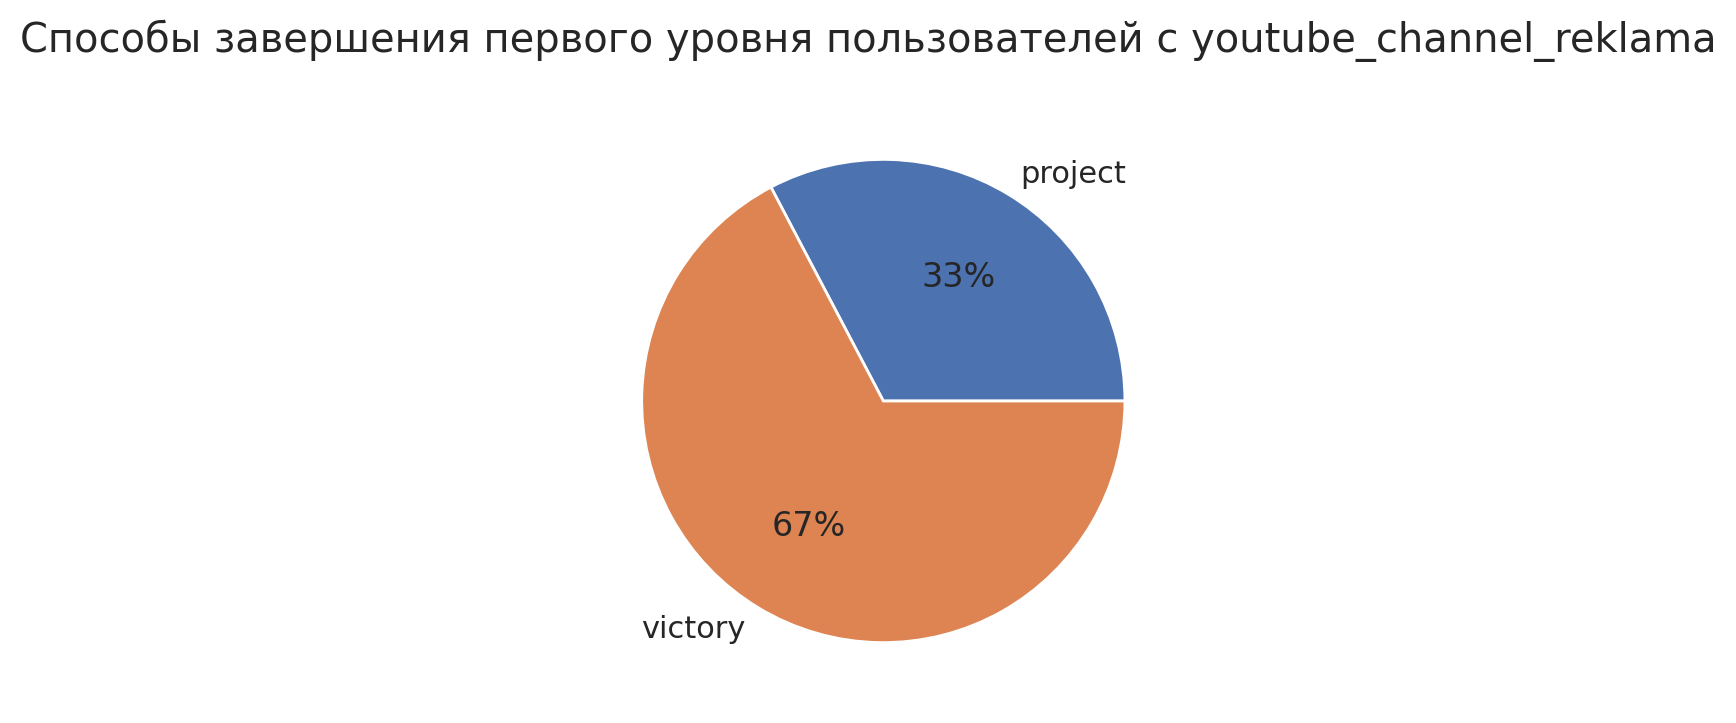

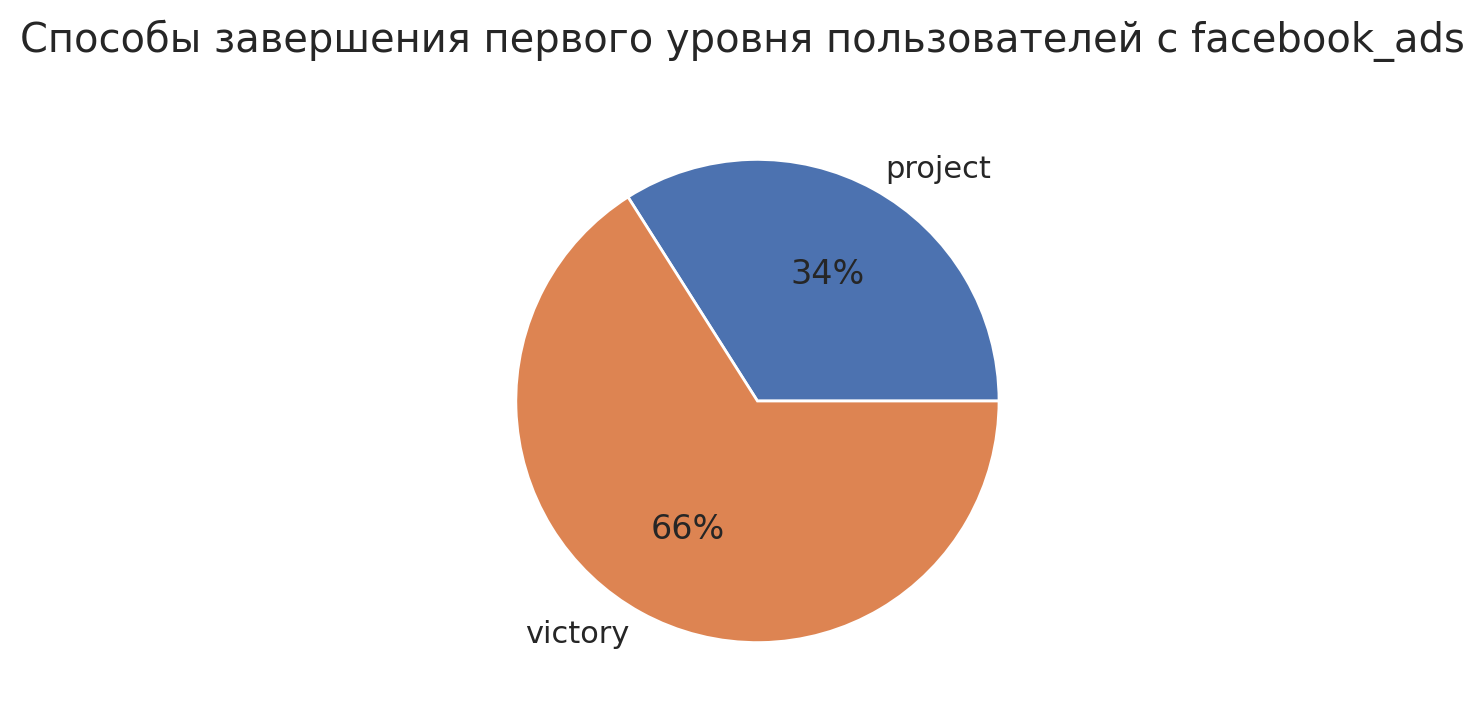

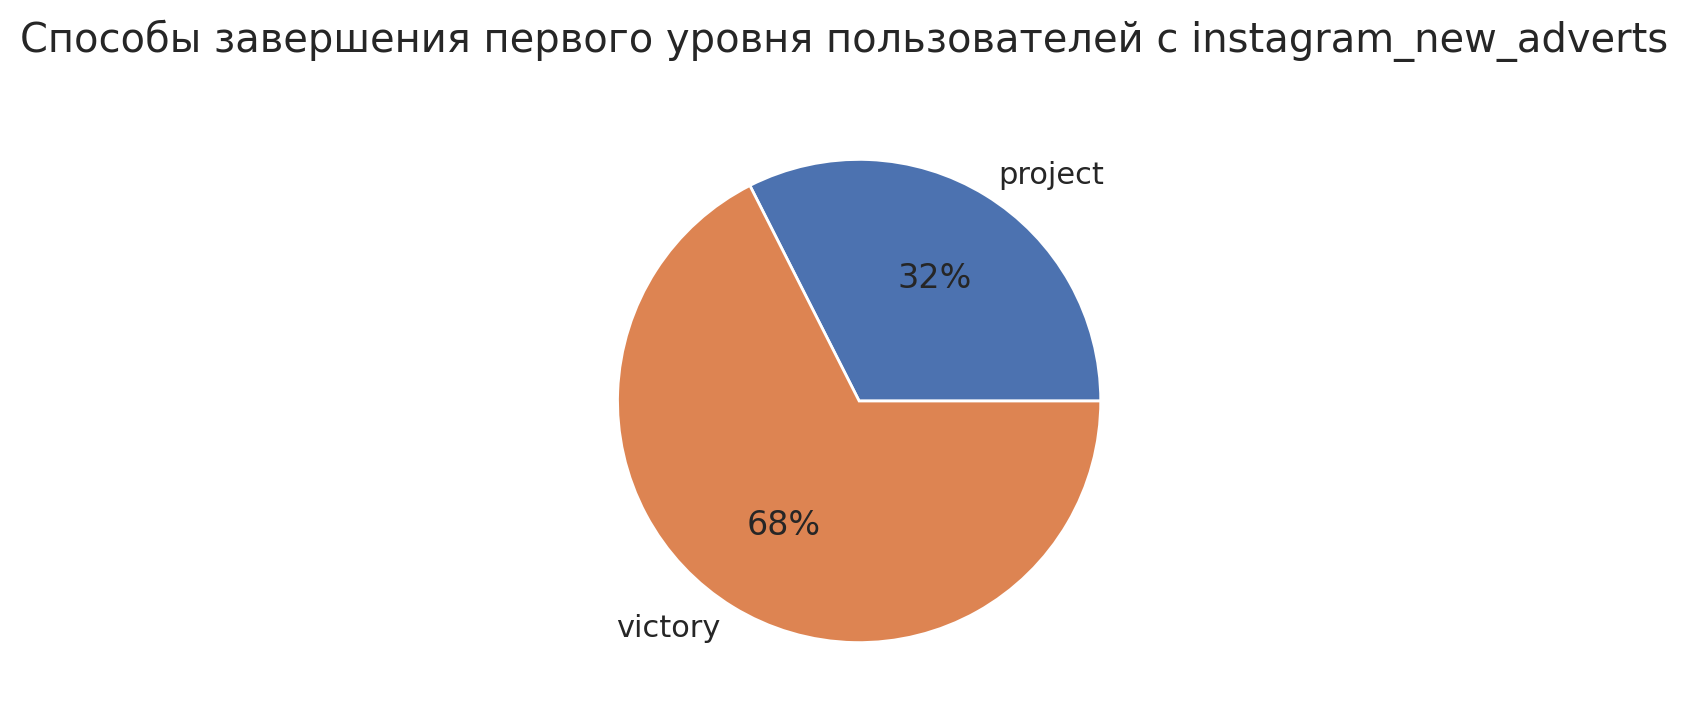

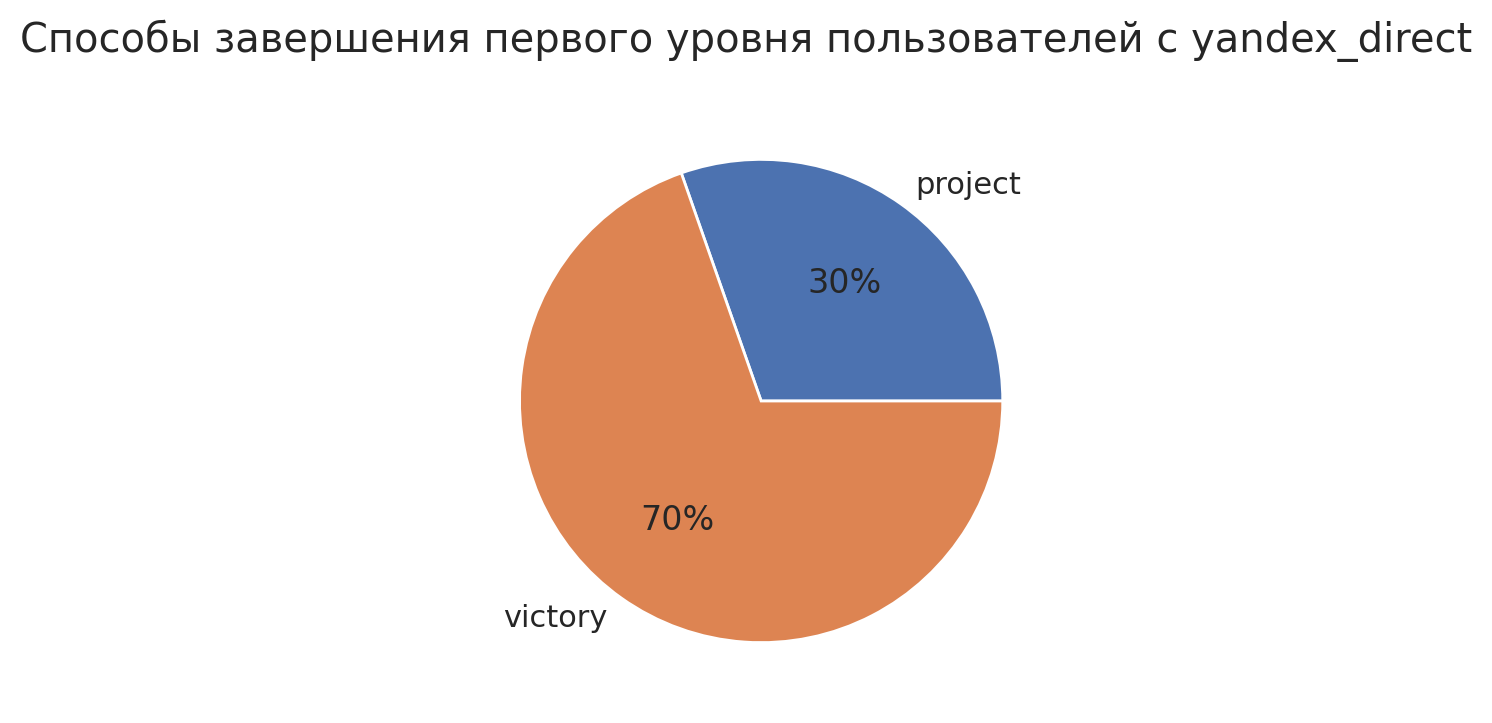

In [42]:
# построим графики
for source in sources:
    project_players = ga_us.query('project_type == "satellite_orbital_assembly" & source == @source')['user_id'].count()
    finished_players = ga_us.query('event == "finished_stage_1" & source == @source')['user_id'].count()
    victory_players = finished_players - project_players 
    a = pd.DataFrame(data = [project_players, victory_players], index = ['project', 'victory'])
    a.plot.pie(subplots=True, legend= False, autopct='%1.0f%%', title=f'Способы завершения первого уровня пользователей с {source}')
    plt.axes().set_ylabel('');

Особой разницы между пользователями, пришедшими с разных источников, не обнаружено.

###     Время прохождения

Среднее количество дней для youtube_channel_reklama: 11.86


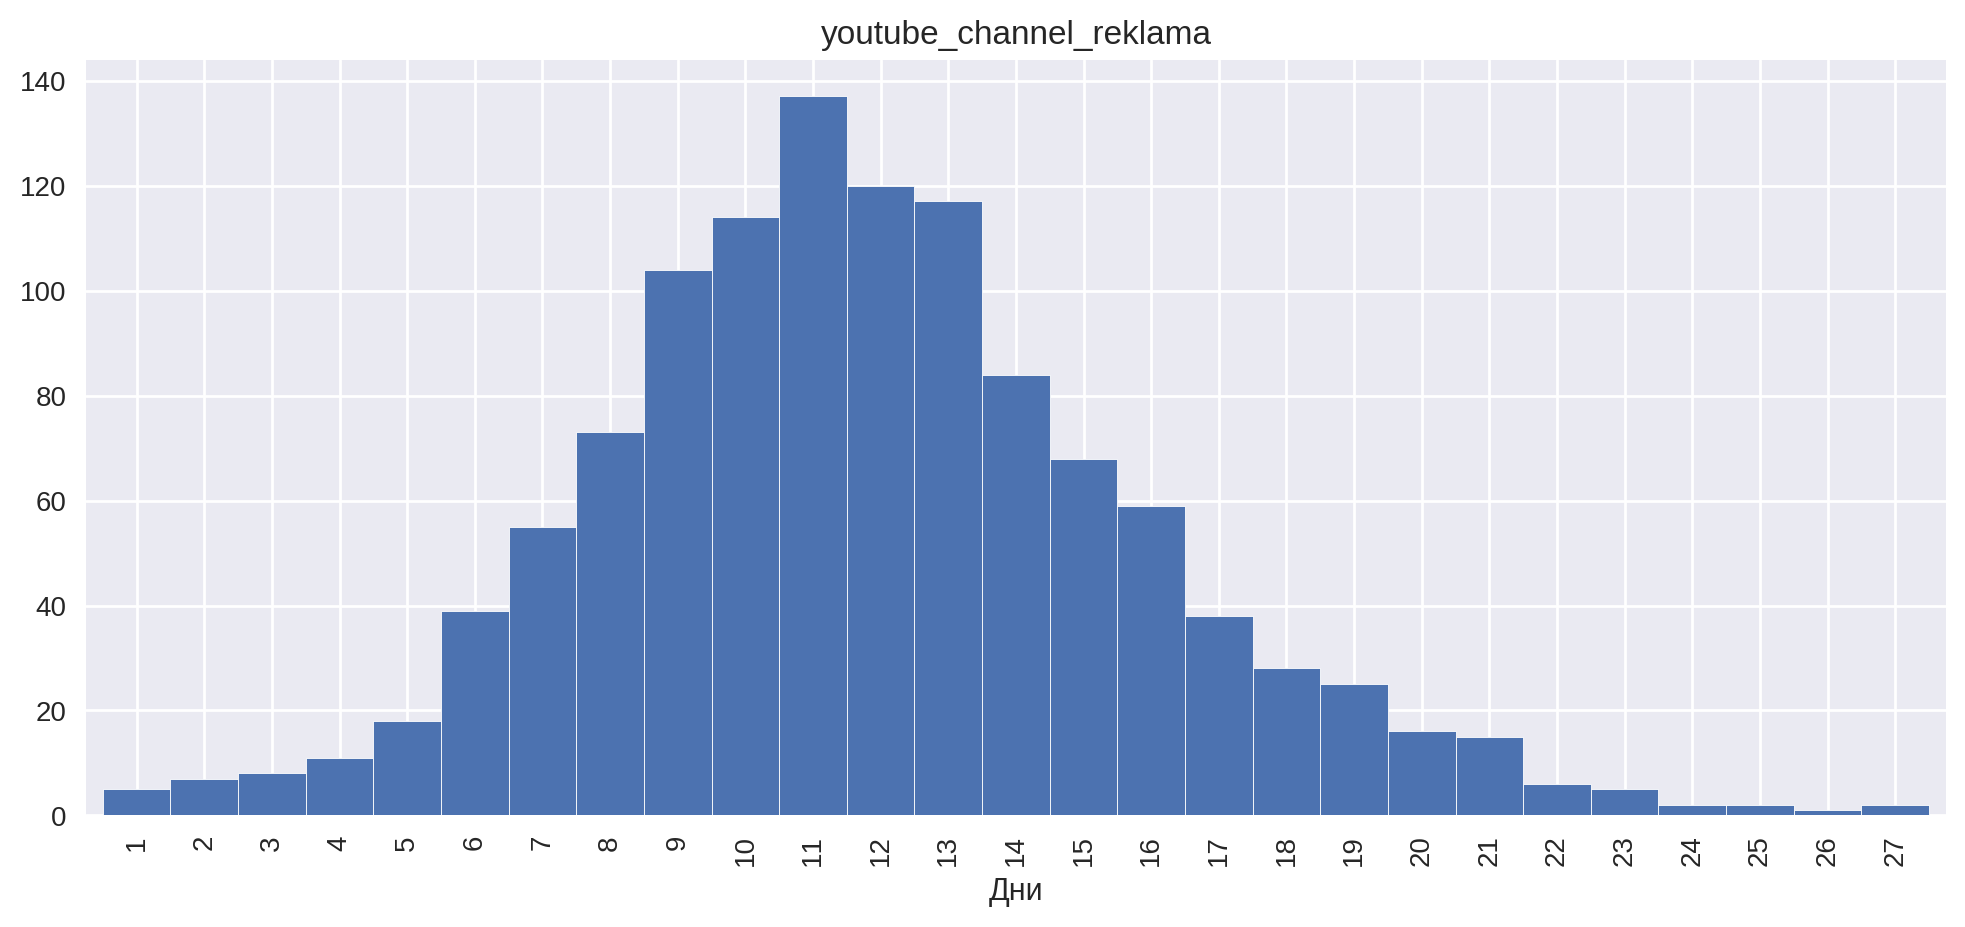

Среднее количество дней для facebook_ads: 11.79


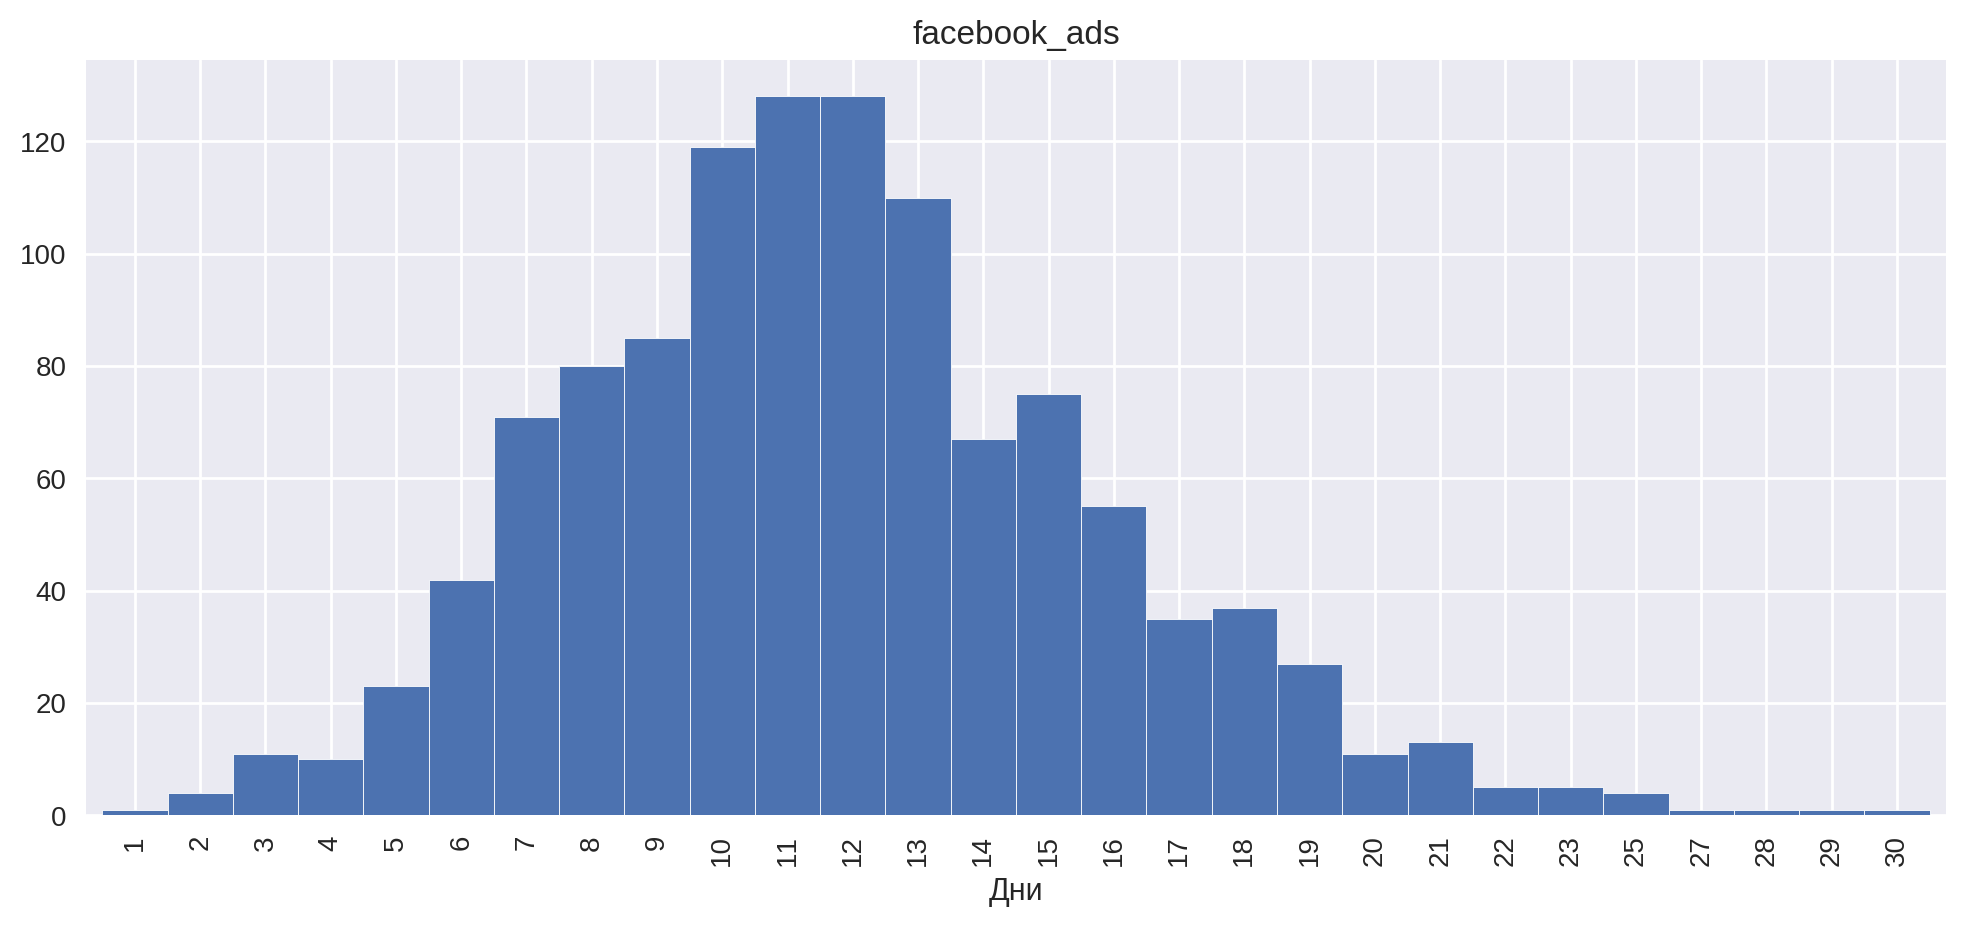

Среднее количество дней для instagram_new_adverts: 11.85


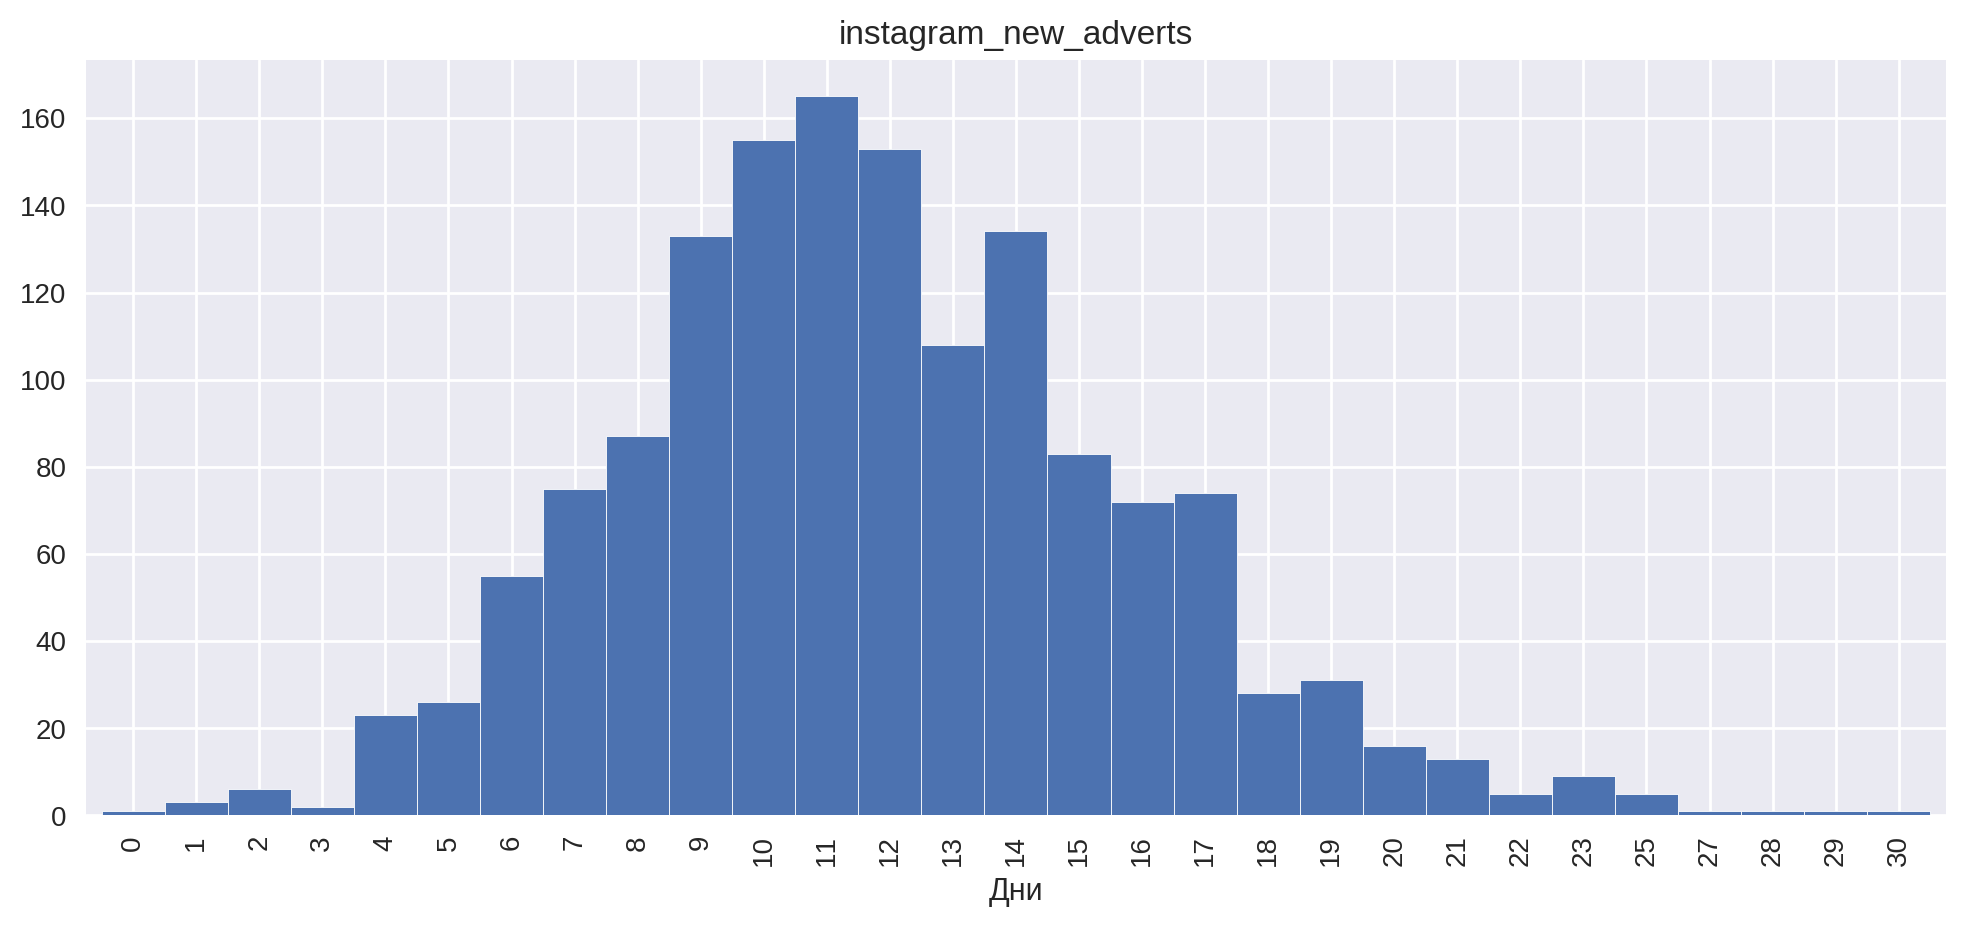

Среднее количество дней для yandex_direct: 11.76


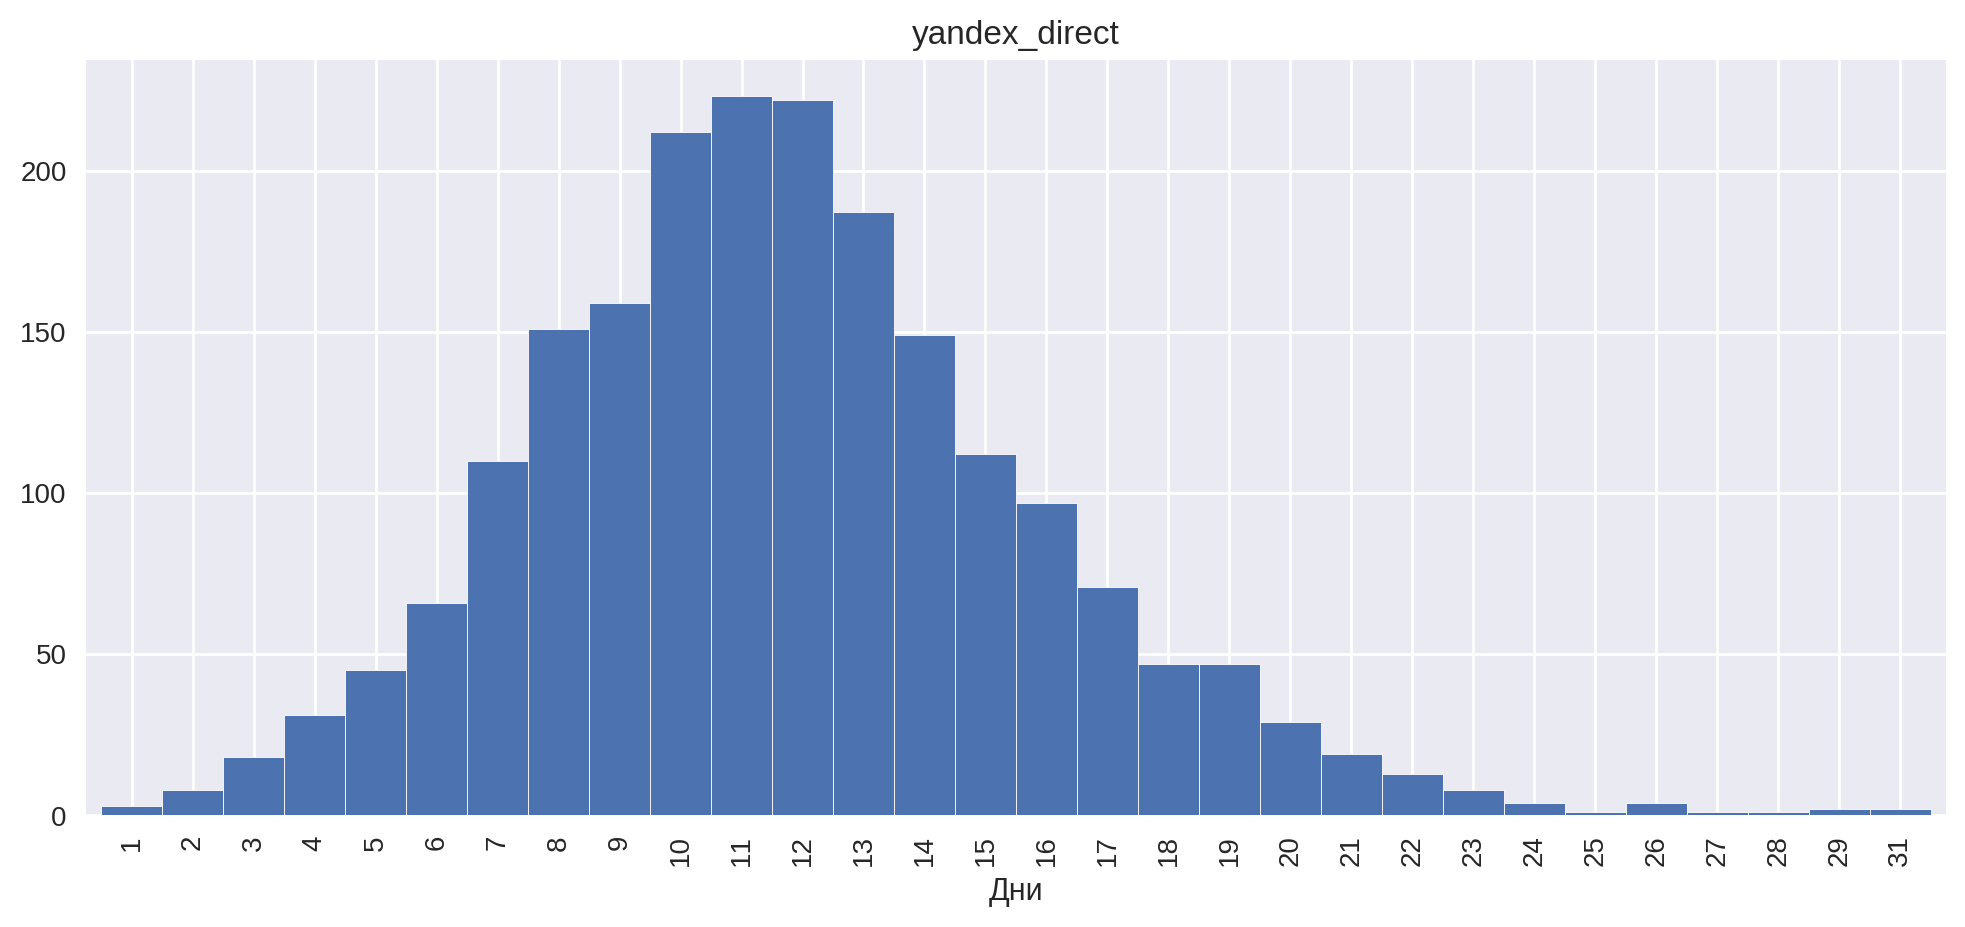

In [43]:
# построим графики, на которых будет отображено количество дней, потраченное на завершение уровня, для каждого канала
days_to_finish_table_source = days_to_finish_table.merge(us, on='user_id', how='left')
for source in sources:
    days = days_to_finish_table_source.query('source == @source').mean()['days_to_finish']
    print(f'Среднее количество дней для {source}: {days:.2f}')
    with plt.style.context('seaborn'):
        ax = days_to_finish_table_source.query('source == @source').groupby('days_to_finish')['finished_stage']\
        .count().to_frame().plot(kind='bar', figsize = (12, 5), legend = False, title = source, stacked=True, width=1)
        ax.set_xlabel('Дни')
        ax.set_label('Пользователи')
        plt.show()

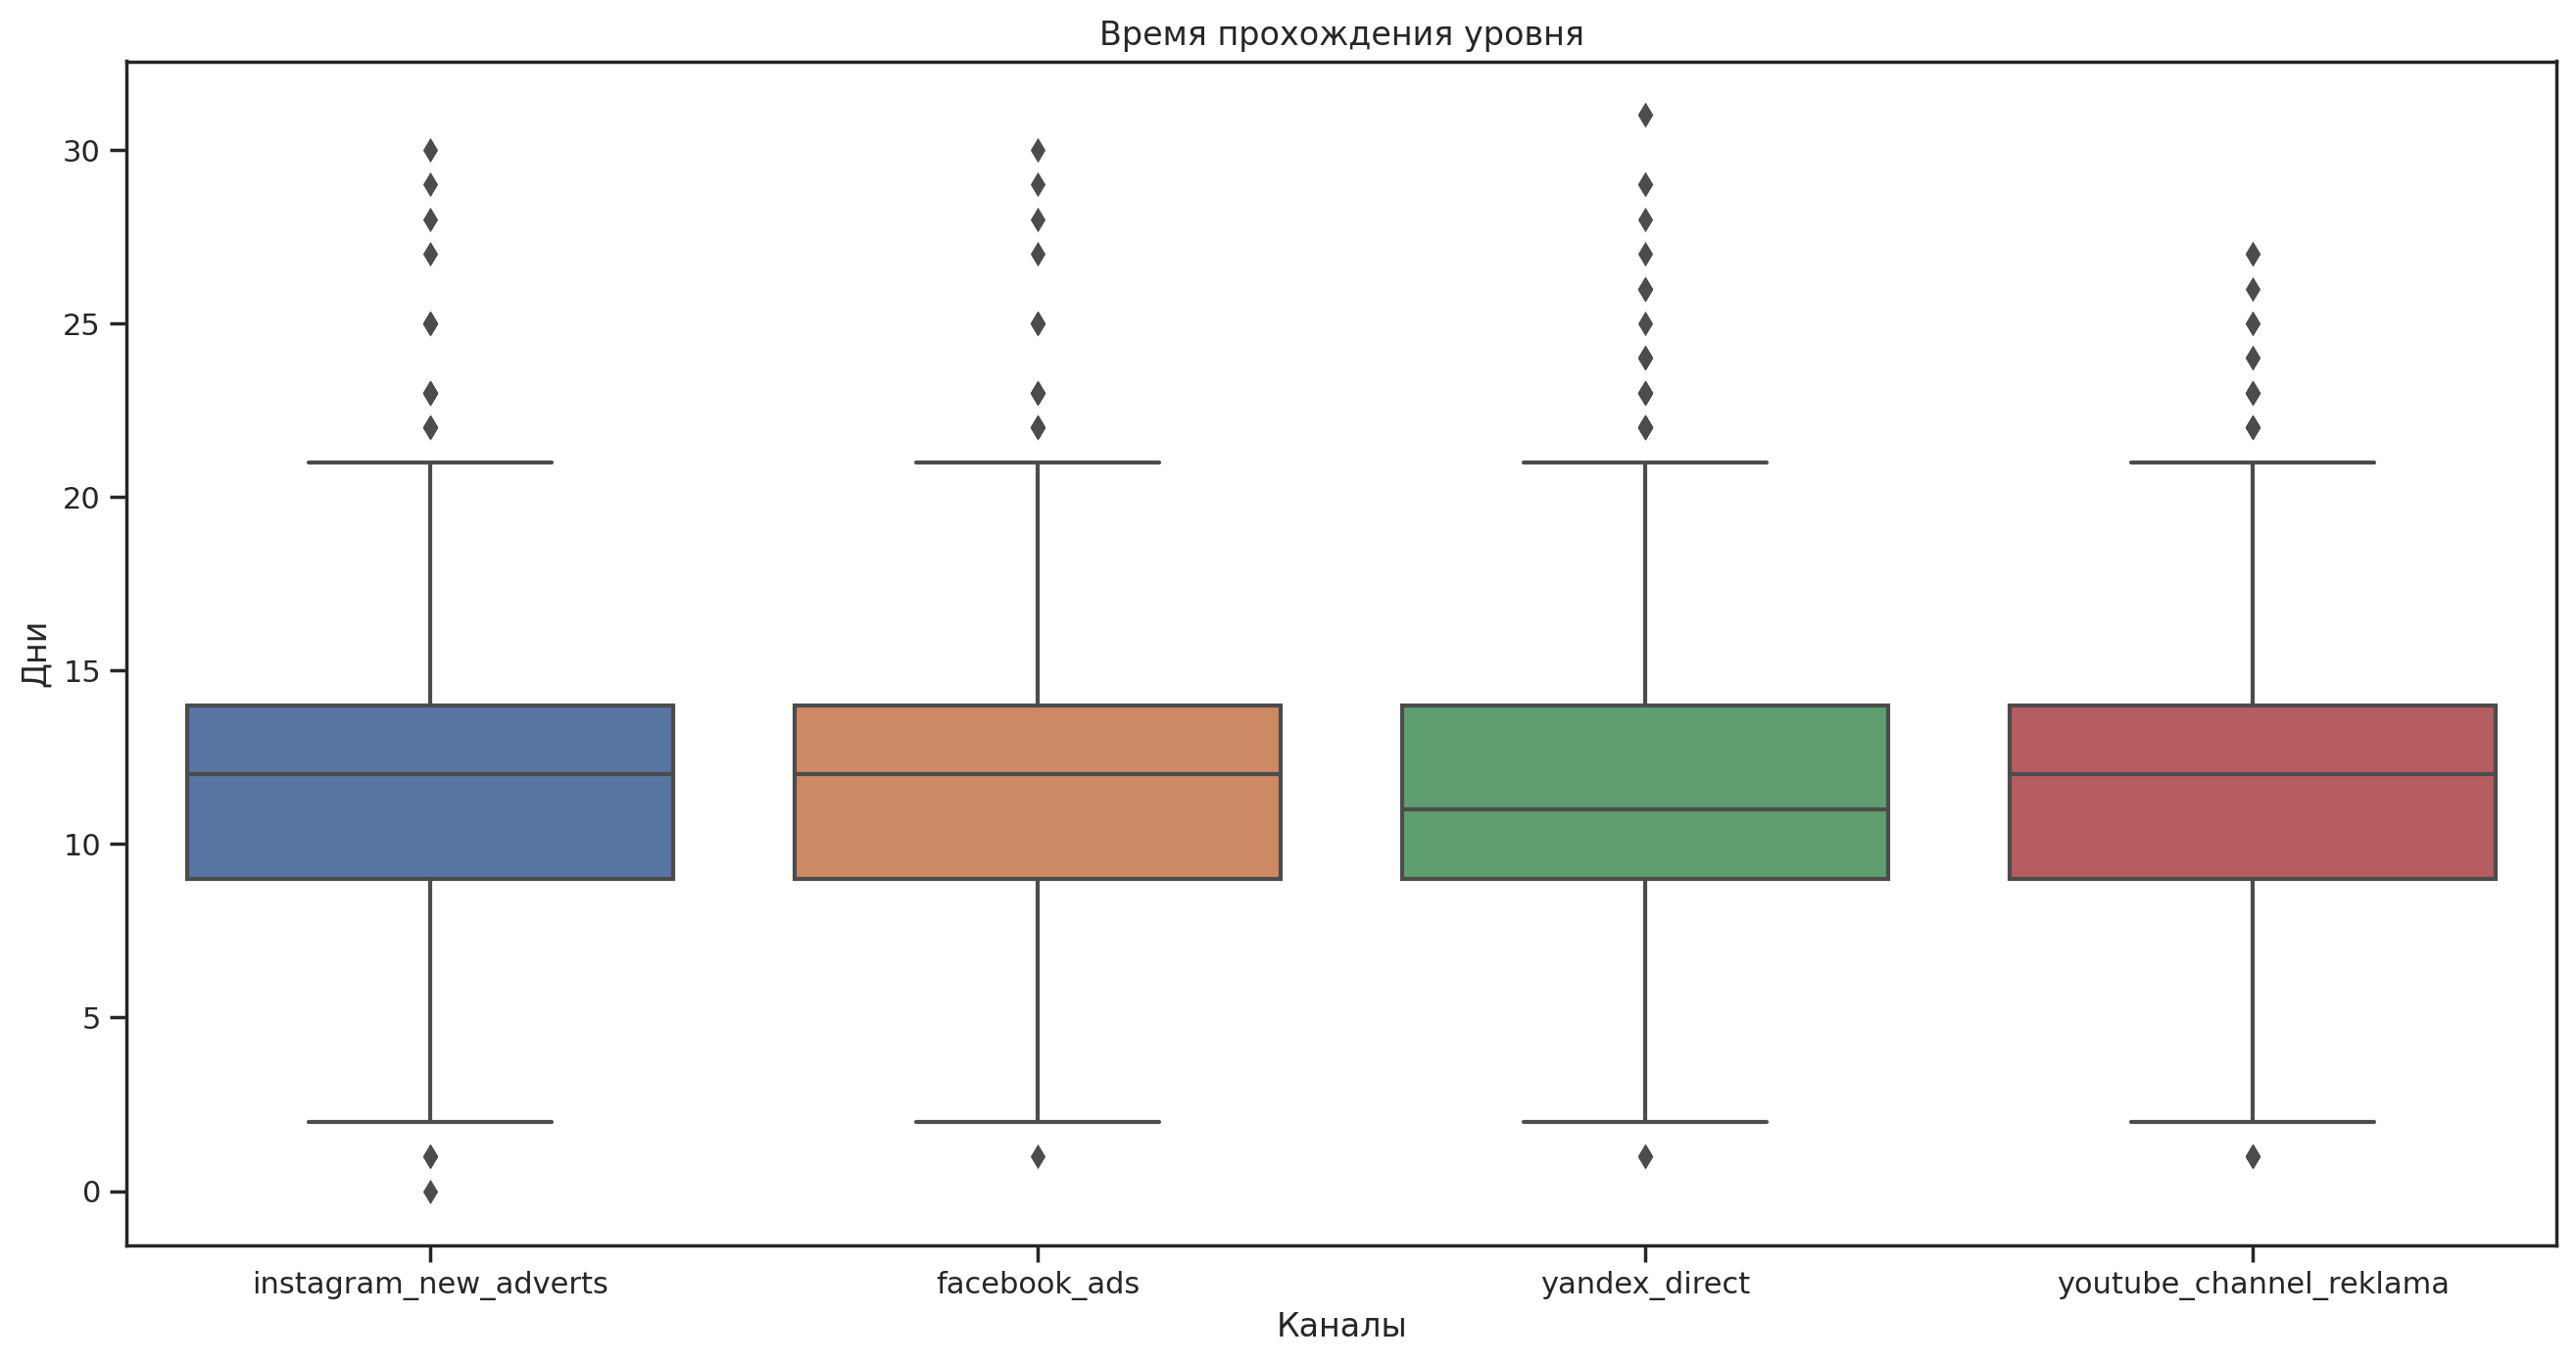

In [44]:
# построим "ящик с усами"
plt.figure(figsize = (16, 8))
sns.boxplot(data = days_to_finish_table_source, y = 'days_to_finish', x='source').set(xlabel = 'Каналы', ylabel = 'Дни', title='Время прохождения уровня')
plt.show()

Отличия в количестве дней в зависимости от источника отсутствуют.

### Количество и тип построенных зданий

Среднее количество зданий для youtube_channel_reklama: 9.30


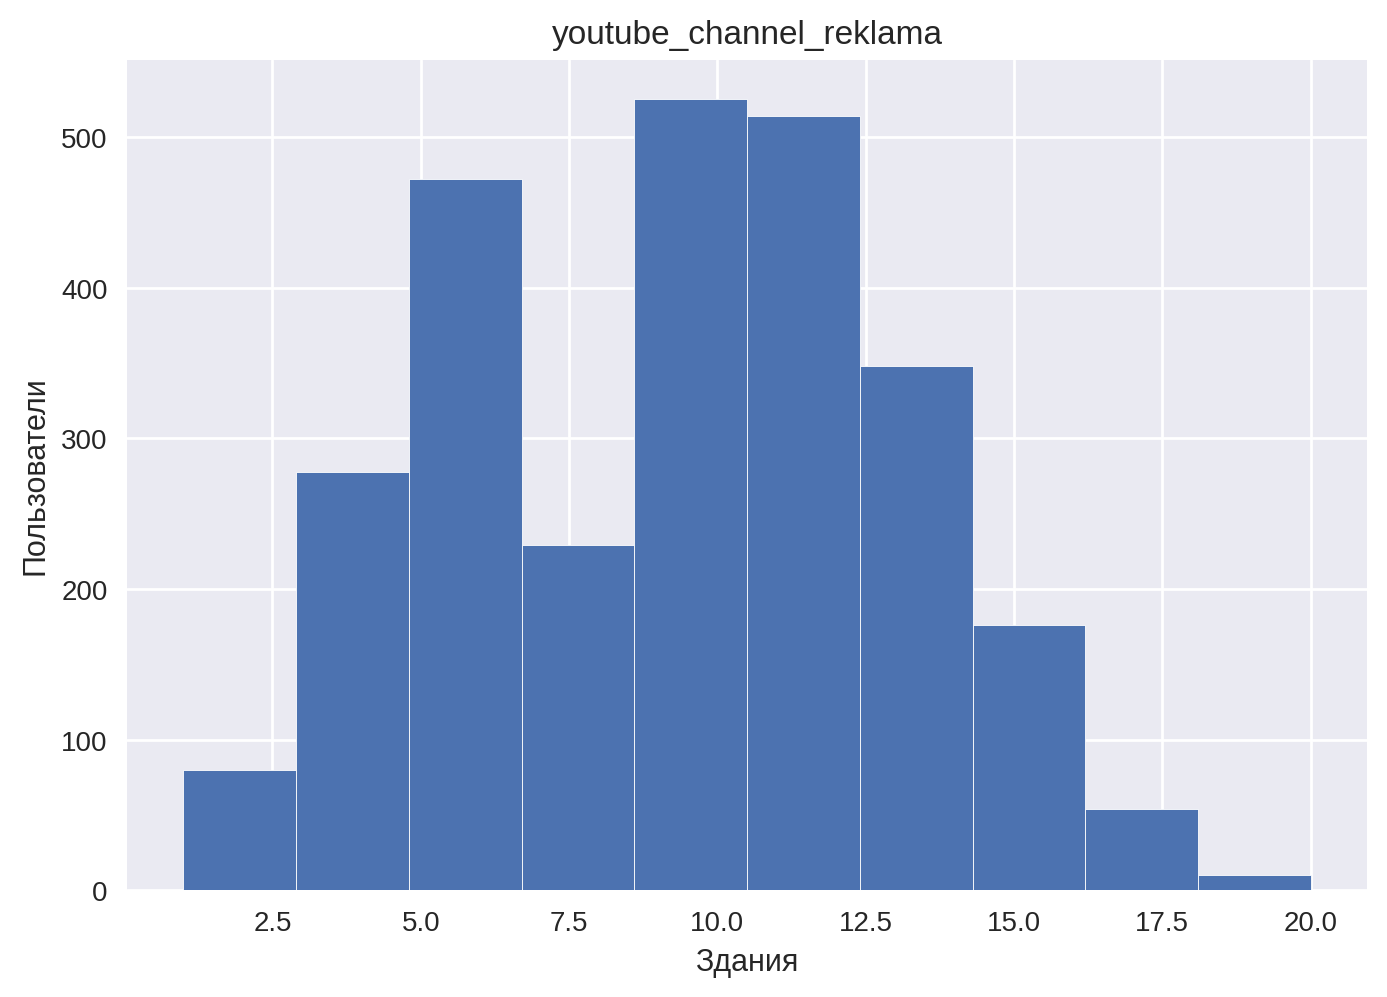

Среднее количество зданий для facebook_ads: 9.59


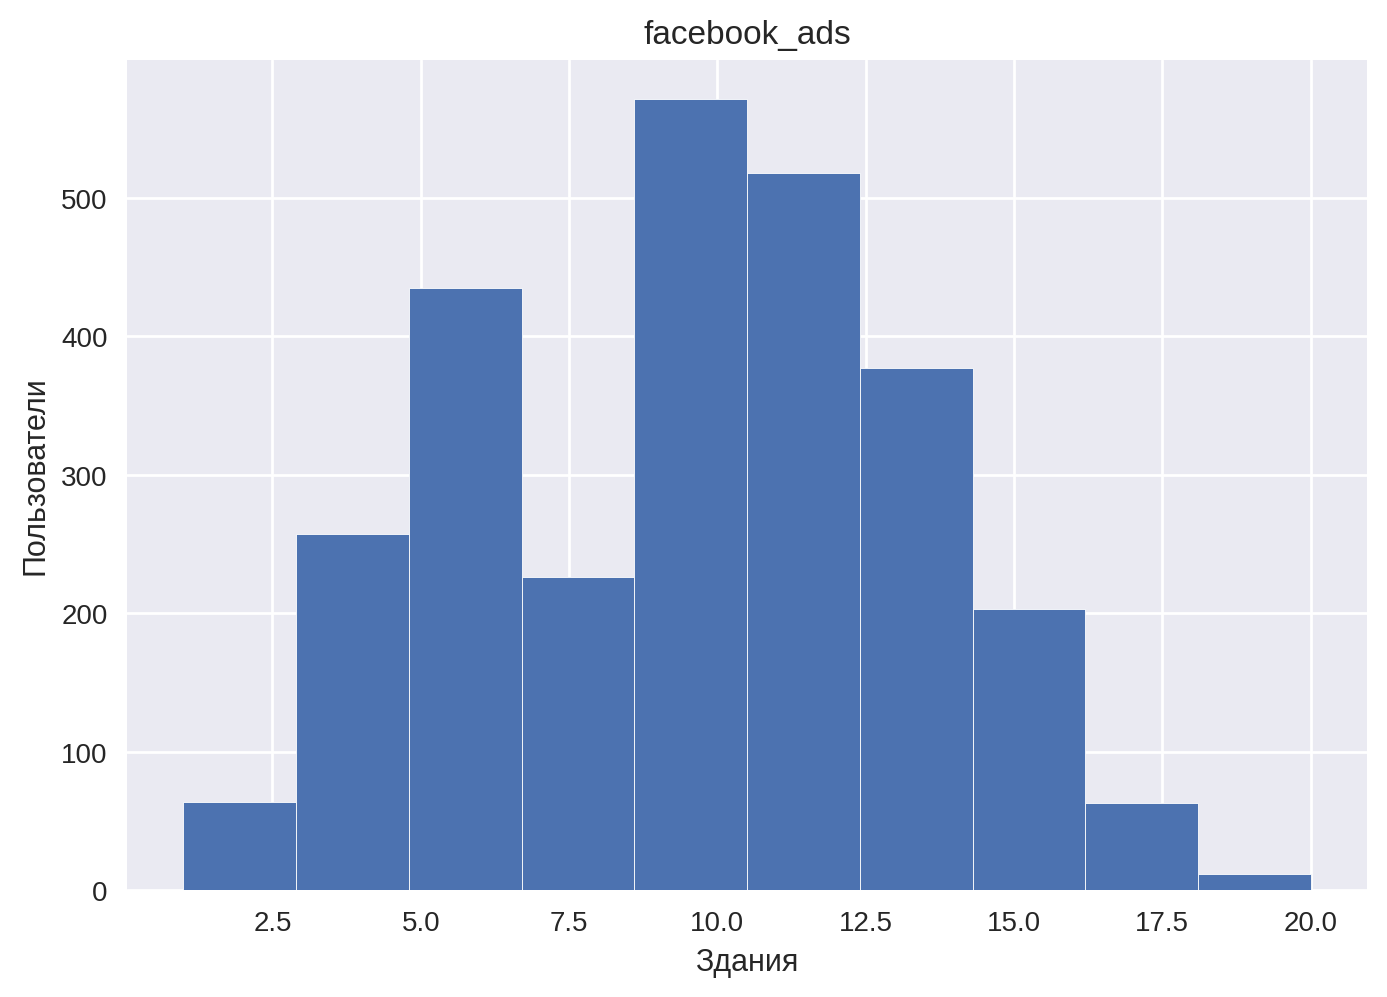

Среднее количество зданий для instagram_new_adverts: 9.51


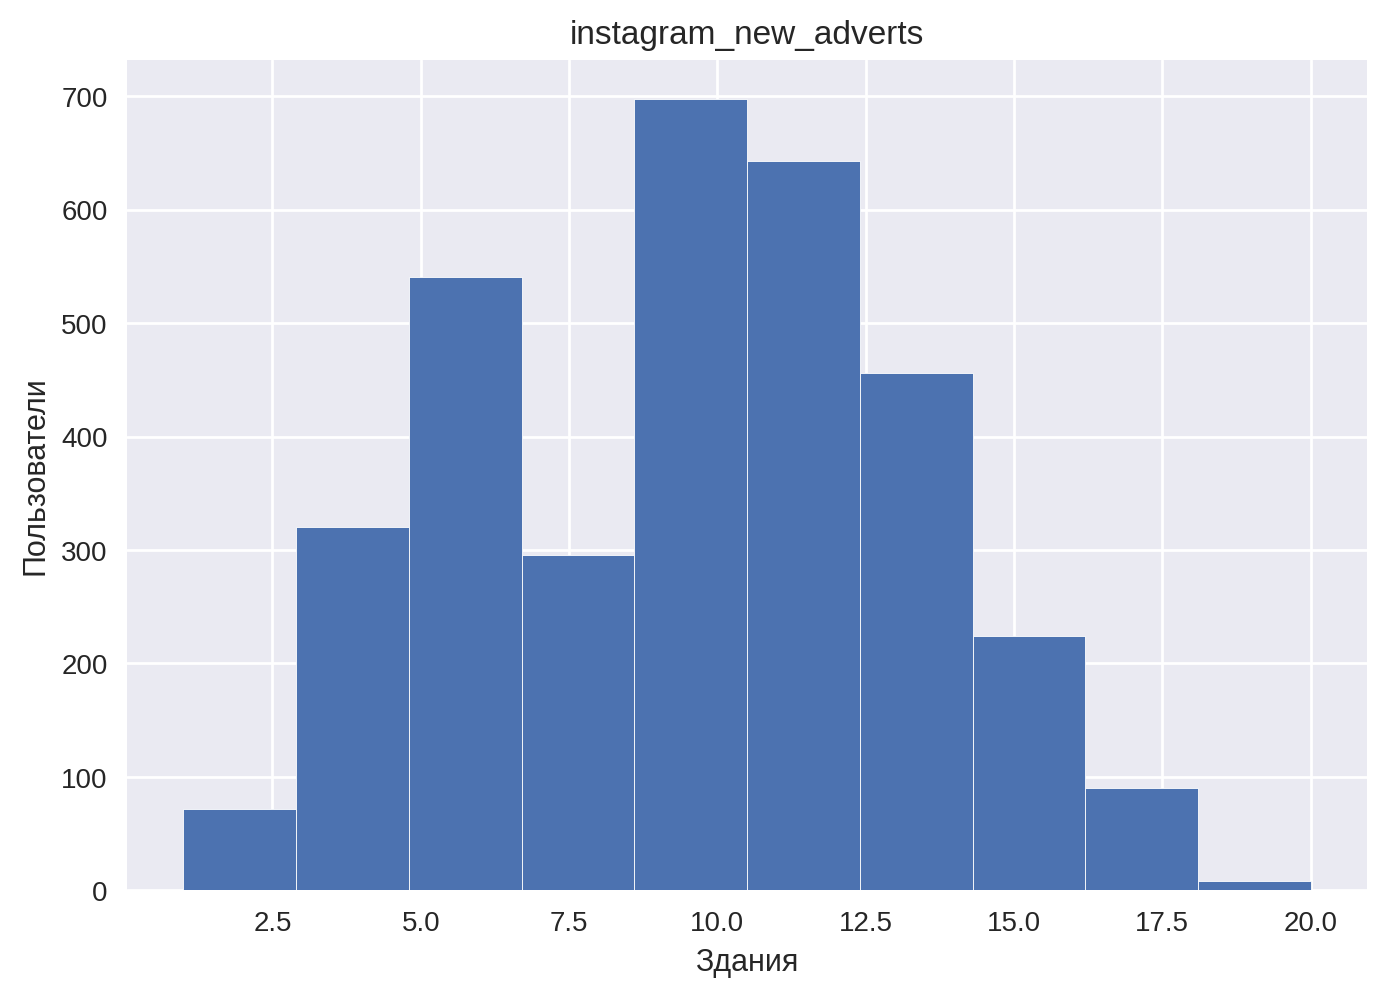

Среднее количество зданий для yandex_direct: 9.35


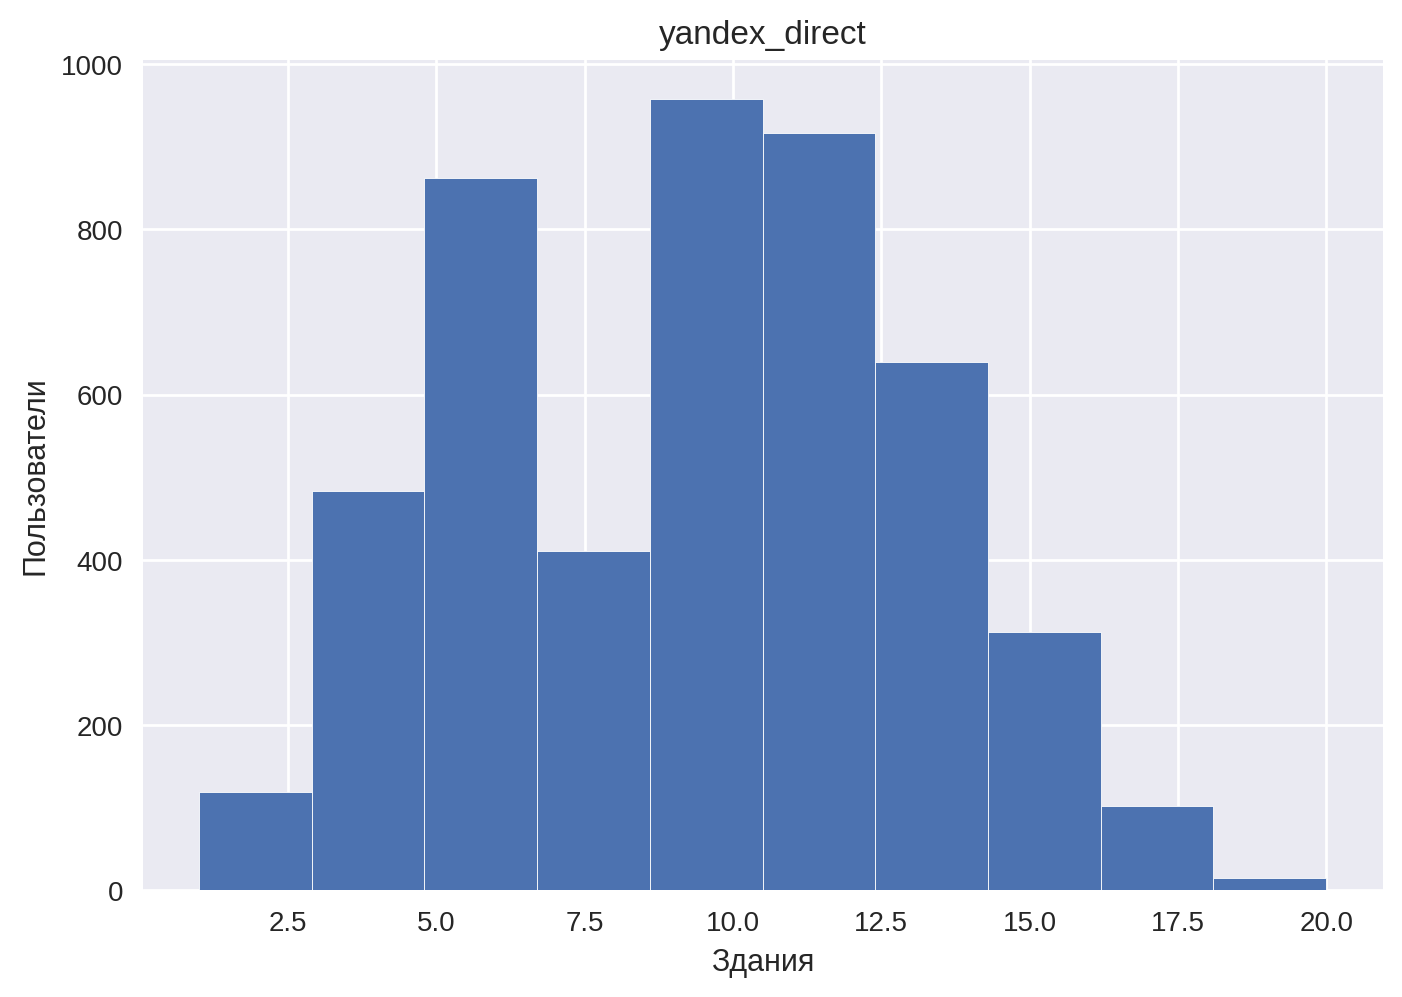

In [45]:
# постром графики с количеством построенных зданий для каждого канала
for source in sources:
    buildings = ga_us.query('event == "building" & source == @source').groupby('user_id')['event'].count().mean()
    with plt.style.context('seaborn'):
        print(f'Среднее количество зданий для {source}: {buildings:.2f}')
        ax = ga_us.query('event == "building" & source == @source').groupby('user_id')['event'].count().to_frame().hist()
        plt.title(source)
        plt.xlabel('Здания')
        plt.ylabel('Пользователи')
        plt.show()

Отличия в количестве зданий в зависимости от источника отсутствуют.

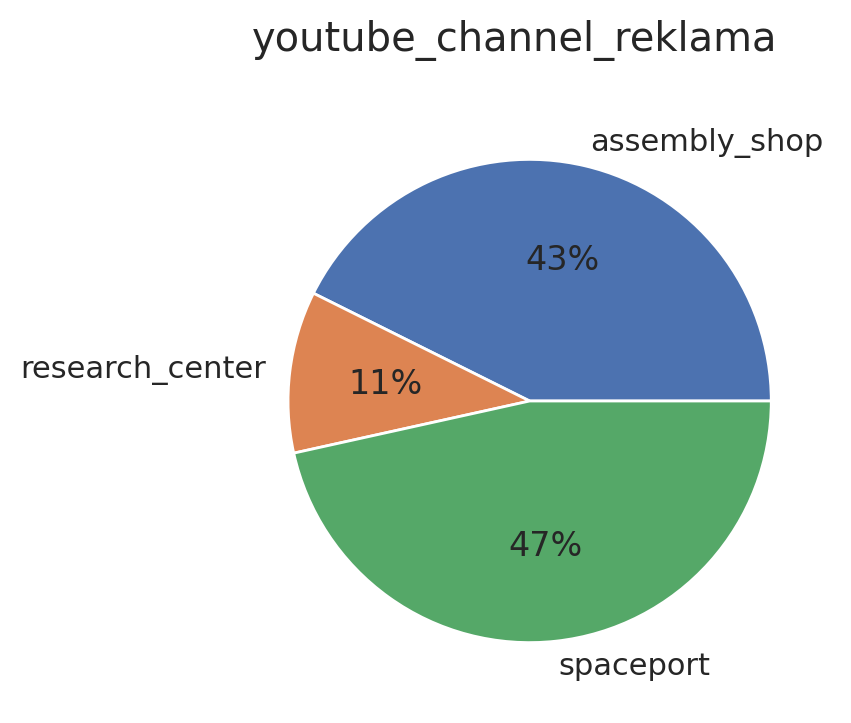

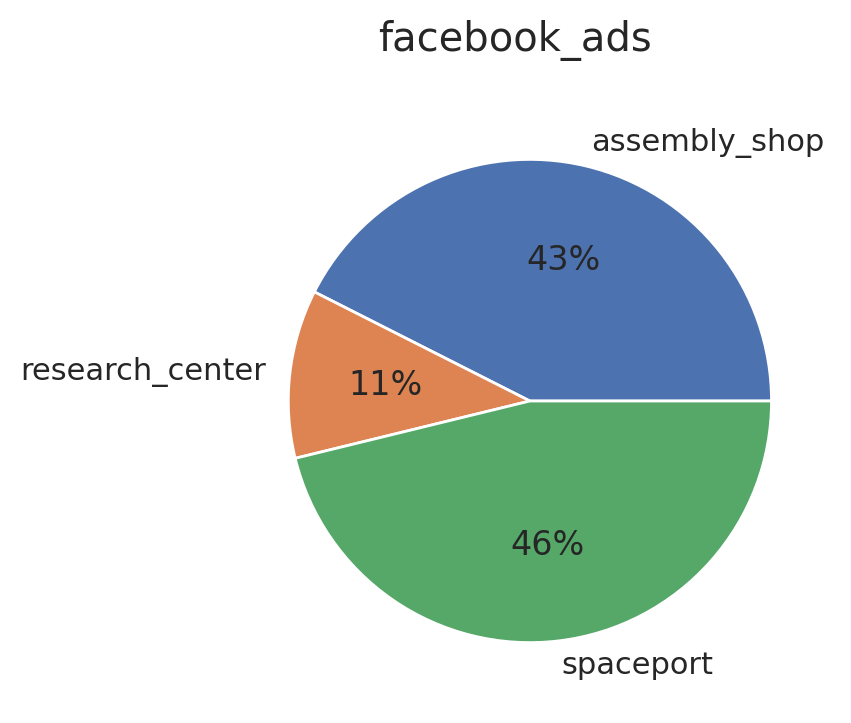

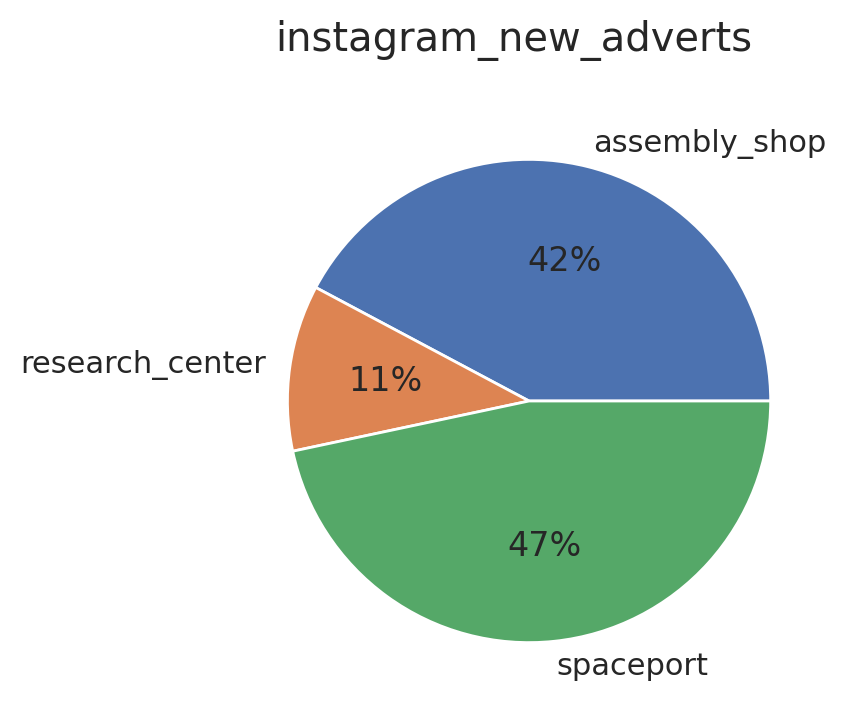

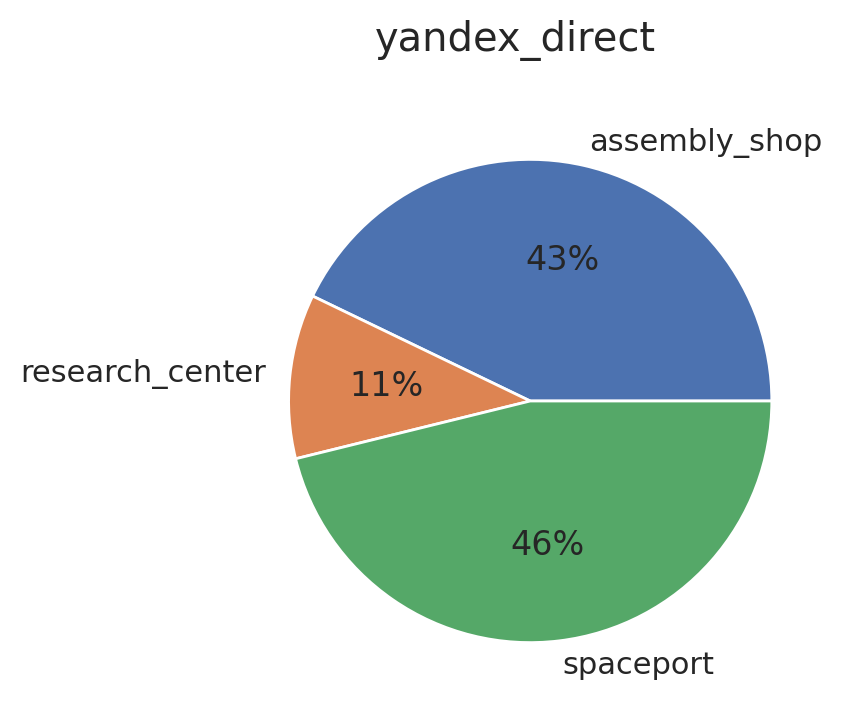

In [46]:
# посмотрим, какие здания строят игроки с разных каналов
for source in sources:
    table = ga_us.query('event == "building" & source == @source').groupby('building_type')['event'].count().to_frame()
    table.plot.pie(subplots=True, legend= False, autopct='%1.0f%%', title=source)
    plt.axes().set_ylabel('')
    plt.show()

Все игроки строят примерно одинаковые здания вне зависимости от канала.

###    Доля игроков, не перешедших на следующий уровень после завершения проекта

In [47]:
# добавим к таблице project_complete_table столбец с источником
project_complete_table_source = project_complete_table.merge(us, on = 'user_id', how = 'left')
project_complete_table_source

,user_id,project_complete,last_event,source
0,006380d6-67a6-45de-ab1e-6eb54ad8dbe8,2020-05-16,2020-05-16,youtube_channel_reklama
1,00be7371-fa79-4fbd-b8e7-8ba32e3f8f82,2020-05-21,2020-05-24,instagram_new_adverts
2,00c2b9f2-2615-439c-aed0-6974e4c6c1c1,2020-05-26,2020-05-27,youtube_channel_reklama
3,00de2809-403e-4476-a2f7-ca1b11700190,2020-05-18,2020-05-18,instagram_new_adverts
4,00e83261-5fd4-4939-9616-802b5a0202c6,2020-05-17,2020-05-20,yandex_direct
...,...,...,...,...
1861,ff50f63a-c4b3-494e-8bf9-3f19dbfc513e,2020-05-21,2020-05-23,facebook_ads
1862,ff60fcd1-4329-494e-b82d-461fbdf5b5eb,2020-05-10,2020-05-13,facebook_ads
1863,ff83bdd8-f49a-49fd-8aad-9fa1fb30d516,2020-05-14,2020-05-18,youtube_channel_reklama
1864,ff841992-d93b-462e-bc6e-18c24a514f36,2020-05-15,2020-05-16,youtube_channel_reklama


In [48]:
# для каждого канала найдем долю пользователей, которые не сразу же перешли на новый уровень,
# а продолжили строить здания после завершения проекта
for source in sources:
    share = len(project_complete_table_source.query('last_event>project_complete & source == @source'))\
          /len(project_complete_table_source.query('source == @source'))
    print(f'Доля пользователей, не перешедших сразу же новый уровень после завершения проекта, с канала {source}: {share:.2%}')

Доля пользователей, не перешедших сразу же новый уровень после завершения проекта, с канала youtube_channel_reklama: 63.85%
Доля пользователей, не перешедших сразу же новый уровень после завершения проекта, с канала facebook_ads: 65.47%
Доля пользователей, не перешедших сразу же новый уровень после завершения проекта, с канала instagram_new_adverts: 68.70%
Доля пользователей, не перешедших сразу же новый уровень после завершения проекта, с канала yandex_direct: 70.16%


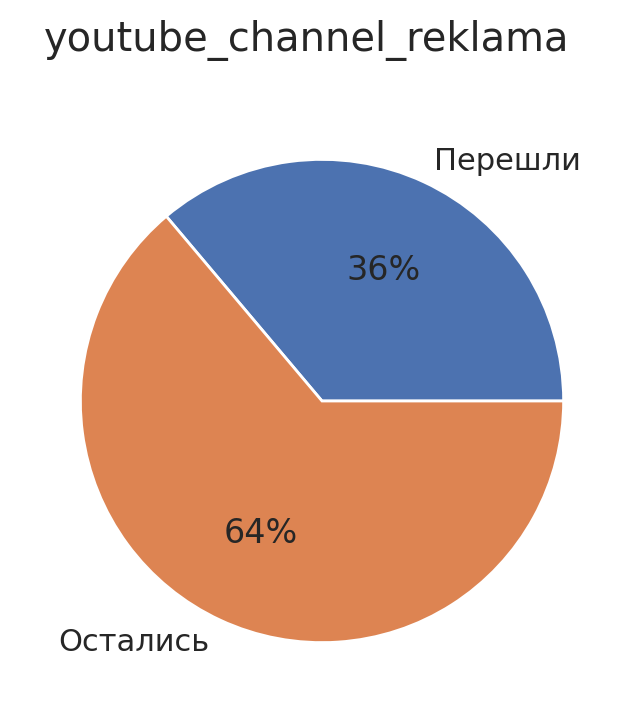

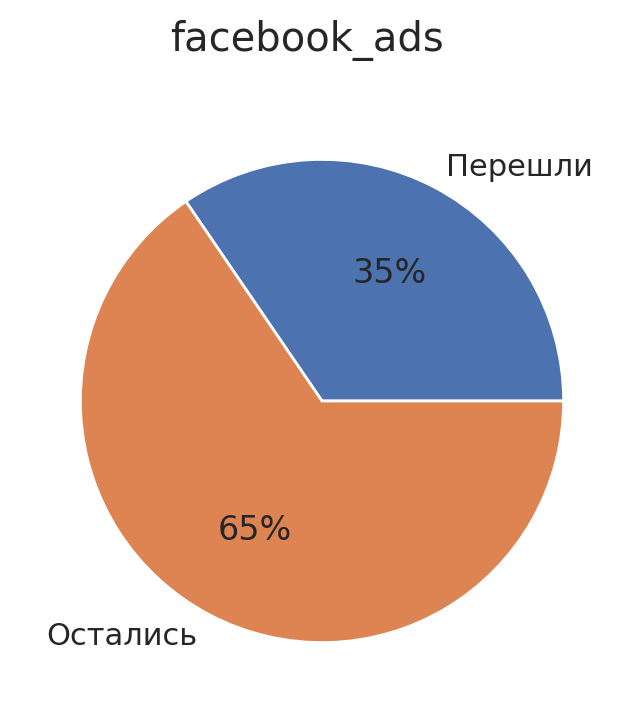

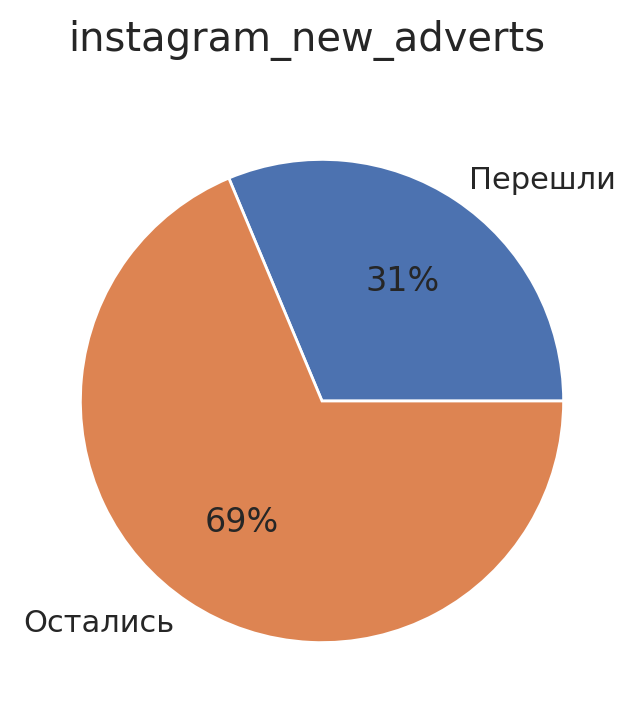

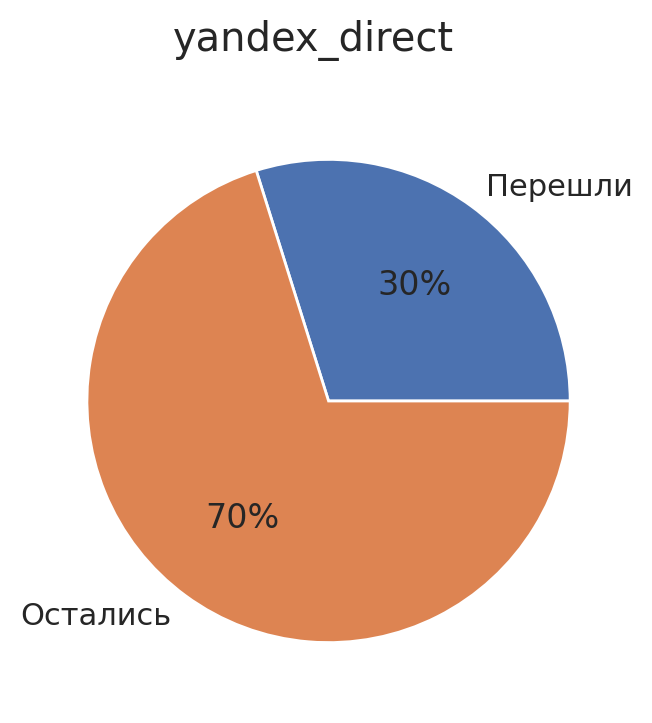

In [49]:
# построим графики
for source in sources:
    remaining_players = project_complete_table_source.query('last_event>project_complete & source == @source')['user_id'].count()
    all_players = project_complete_table_source.query('source == @source')['user_id'].count()
    completed_players = all_players - remaining_players
    a = pd.DataFrame(data = [completed_players, remaining_players], index = ['Перешли', 'Остались'])
    a.plot.pie(subplots=True, legend= False, autopct='%1.0f%%', title=source)
    plt.axes().set_ylabel('');

Игроки с канала yandex_direct обычно чуть чаще "засиживаются" на уровне по сравнению с другими, а игроки с канала youtube_channel_reklama - чуть реже. Учитывая нашу предполагаемую модель монетизации, то получается, что пользователи, пришедшие с yandex_direct потенциально приносят больше прибыли, а пользователи с youtube_channel_reklama - меньше. Можно попробовать исправить эту ситуацию, несколько подкорректировав рекламу с youtube_channel_reklama - например, в ней агитировать пользователей проходить уровень через завершение проекта.

## Проверка гипотез

**H0:** Время завершения уровня не различается в зависимости способа прохождения;

**H1:** Время завершения уровня различается в зависимости способа прохождения.

In [50]:
# создадим таблицу с пользователями, которые завершили проект
project_complete_users = ga.query('project_type == "satellite_orbital_assembly"')[['user_id', 'project_type']]\
                            .reset_index(drop=True)
project_complete_users

,user_id,project_type
0,e3c66498-9d45-4000-9392-f81e6796e7da,satellite_orbital_assembly
1,936e7af6-8338-4703-a1df-fc6c3f5b8e34,satellite_orbital_assembly
2,a4491c86-c498-4f74-a56e-65c136d0e9a1,satellite_orbital_assembly
3,85d9e675-562b-4329-8bbd-14d3b39096be,satellite_orbital_assembly
4,1889ca71-3c57-4e61-9ea6-a711971bbf0a,satellite_orbital_assembly
...,...,...
1861,9d98001c-7e14-40d7-896e-46b3047365fd,satellite_orbital_assembly
1862,df4a1e13-eba9-4928-a7cf-ee303d6f80f9,satellite_orbital_assembly
1863,82e46f34-e243-4728-8e20-2e171fc33ea4,satellite_orbital_assembly
1864,fe032991-71e0-48c5-889f-4c3805ba4c9b,satellite_orbital_assembly


In [51]:
# добавим к таблице days_to_finish_table столбец, указывающий на то, завершил ли пользователь проект или нет
days_to_finish_table = days_to_finish_table.merge(project_complete_users, on='user_id', how='left')
days_to_finish_table

,user_id,finished_stage,first_event,days_to_finish,project_type
0,001d39dc-366c-4021-9604-6a3b9ff01e25,2020-05-12,2020-05-05,7,NaN
1,003ee7e8-6356-4286-a715-62f22a18d2a1,2020-05-17,2020-05-05,12,NaN
2,004074f8-251a-4776-922c-8348dca1a2f6,2020-05-16,2020-05-04,12,NaN
3,00464e5e-28ed-4be6-bf44-517ef7b3937b,2020-05-15,2020-05-04,11,NaN
4,0056c007-c082-43cc-bdef-afc49bca4cb9,2020-05-16,2020-05-10,6,NaN
...,...,...,...,...,...
5812,ffd002f3-3545-423e-8dba-0c6a2d48a3aa,2020-05-19,2020-05-06,13,NaN
5813,ffe810f4-1a1f-464b-924d-6f120b0cb8df,2020-05-18,2020-05-04,14,NaN
5814,ffef4fed-164c-40e1-bde1-3980f76d0fb5,2020-05-11,2020-05-04,7,NaN
5815,fffb626c-5ab6-47c9-8113-2062a2f18494,2020-05-12,2020-05-04,8,NaN


Среднее количество дней, необходимое для прохождения уровня пользователям, завершившим игру через проект: 13.40


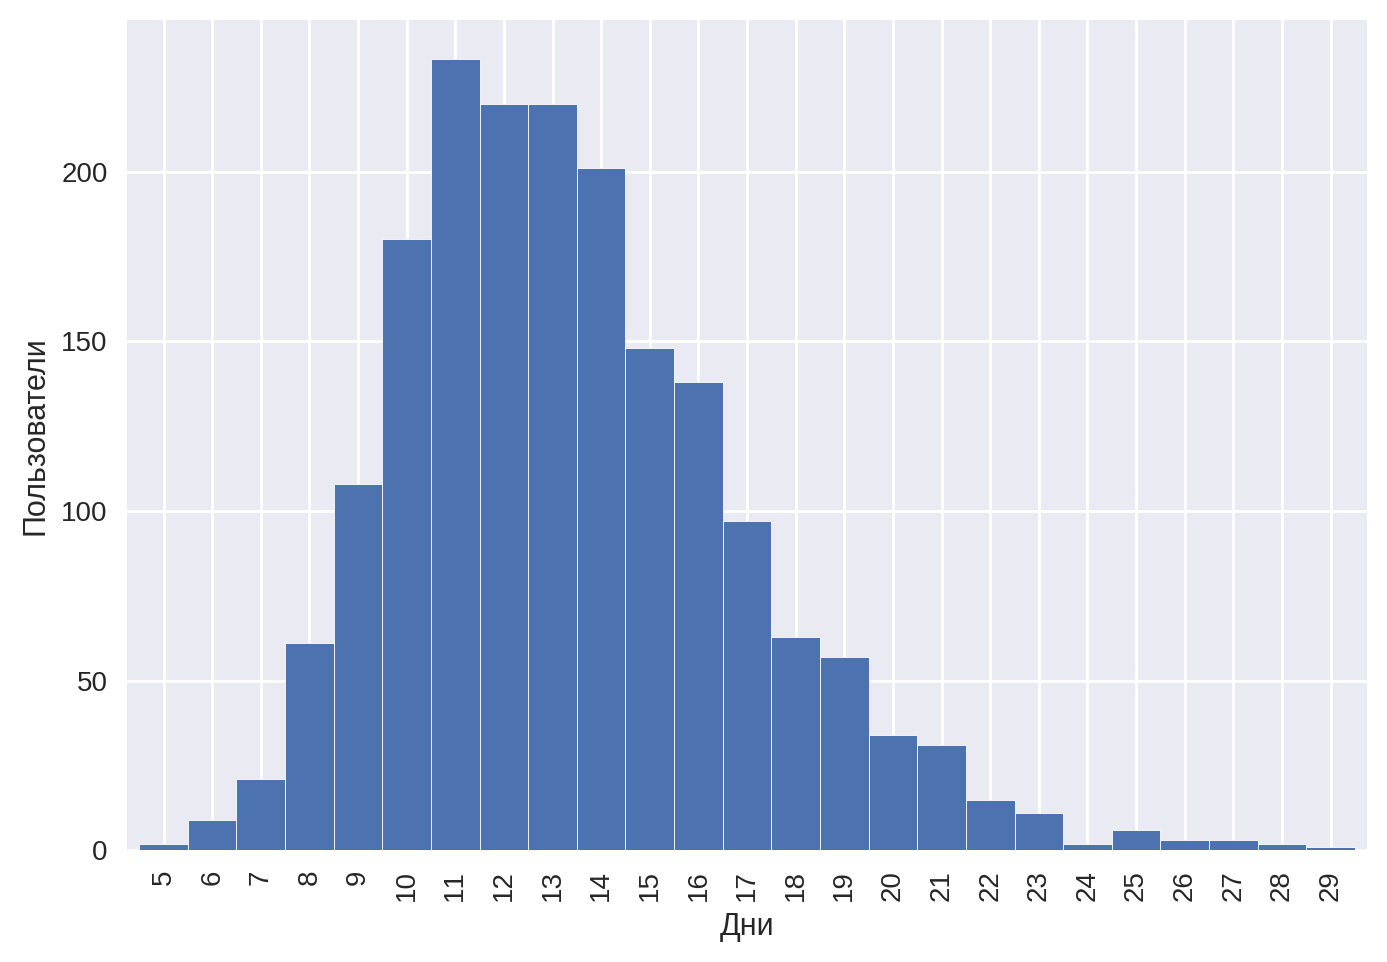

Среднее количество дней, необходимое для прохождения уровня пользователям, завершившим игру не через проект: 11.06


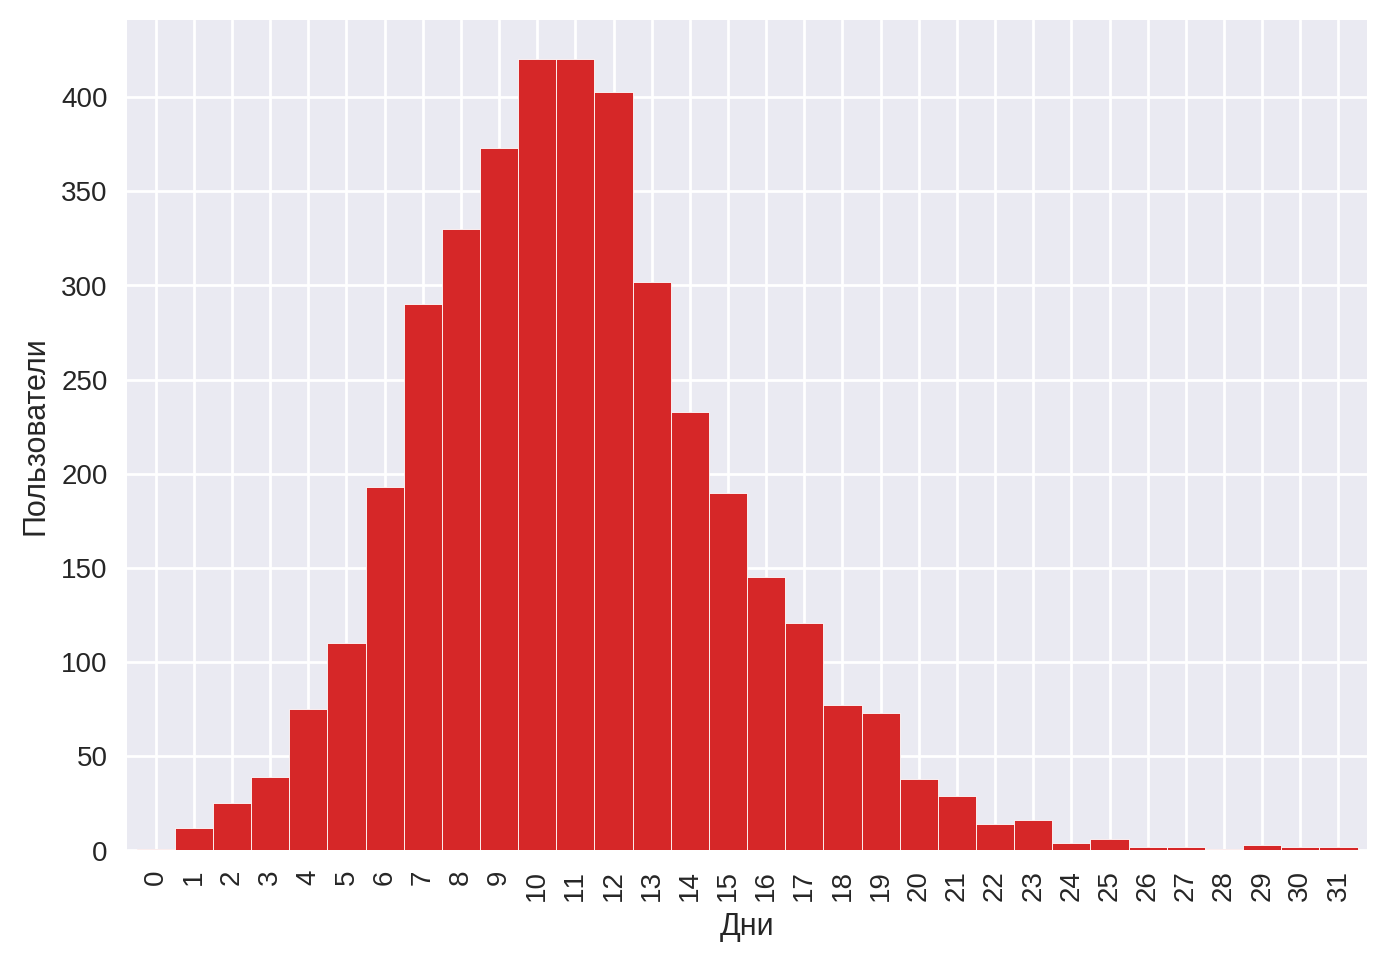

p-значение: 6.570466755643636e-105
Отвергаем нулевую гипотезу


In [52]:
# проведем Т-тест Стьюдента
project = days_to_finish_table[days_to_finish_table['project_type'] == 'satellite_orbital_assembly']['days_to_finish']
not_project = days_to_finish_table[days_to_finish_table['project_type'] != 'satellite_orbital_assembly']['days_to_finish']
print(f'Среднее количество дней, необходимое для прохождения уровня пользователям, завершившим игру через проект: {project.mean():.2f}')
with plt.style.context('seaborn'):
    days_to_finish_table.query('project_type == "satellite_orbital_assembly"').groupby('days_to_finish')['finished_stage']\
    .count().to_frame().plot(kind='bar', stacked=True, legend = False, width=1, )
    plt.xlabel('Дни')
    plt.ylabel('Пользователи')
    plt.show()
    print(f'Среднее количество дней, необходимое для прохождения уровня пользователям, завершившим игру не через проект: {not_project.mean():.2f}')
    days_to_finish_table.query('project_type != "satellite_orbital_assembly"').groupby('days_to_finish')['finished_stage']\
    .count().to_frame().plot(kind='bar', stacked=True, legend = False, width=1, color='tab:red')
    plt.xlabel('Дни')
    plt.ylabel('Пользователи')
    plt.show()
alpha = 0.05
results = st.ttest_ind(project, not_project, equal_var=False)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

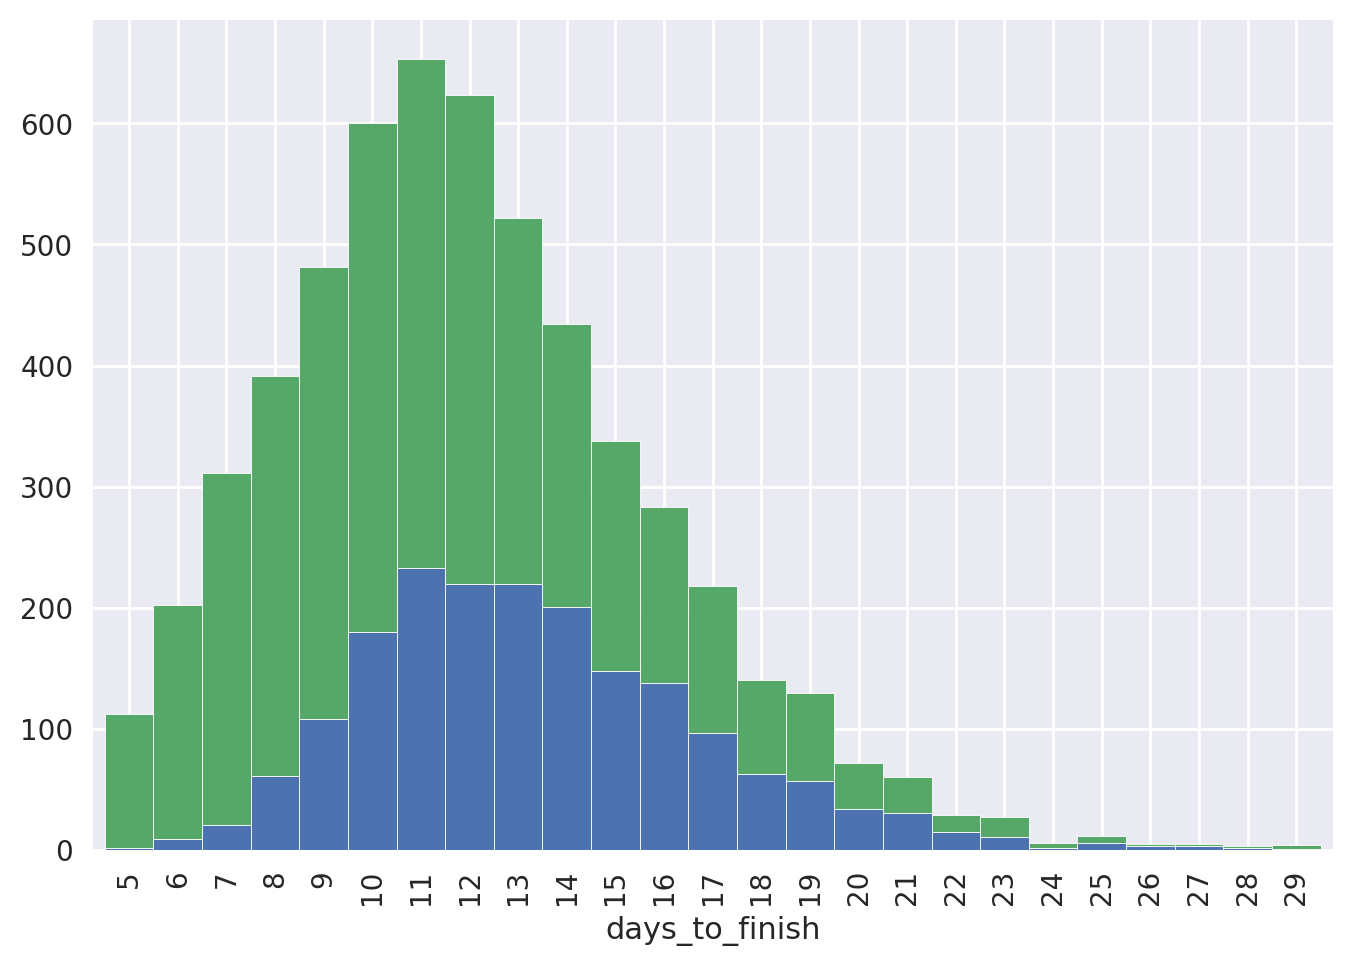

In [53]:
with plt.style.context('seaborn'):
    days_to_finish_table.query('project_type == "satellite_orbital_assembly"').groupby('days_to_finish')['finished_stage']\
        .count().to_frame().rename(columns={'finished_stage':'project'})\
        .merge(days_to_finish_table.query('project_type != "satellite_orbital_assembly"')\
        .groupby('days_to_finish')['finished_stage']\
        .count().to_frame().rename(columns={'finished_stage':'victory'}), on='days_to_finish')\
        .plot(kind='bar', stacked=True, legend = False, width=1);

Нулевой гипотезой была гипотеза о равенстве средних наших выборок. Малое значение p-value говорит нам о том, что вероятность того, что количество требуемых на прохождение дней, не зависит от стиля прохождения, крайне мала, потому нулевую гипотезу отвергаем.

**H0:** Количество построенных зданий не различается в зависимости от способа прохождения;

**H1:** Количество построенных зданий различается в зависимости от способа прохождения.

In [54]:
number_of_buildings = ga_us.query('event == "building"').groupby('user_id')['event'].count().to_frame().merge(project_complete_users, on='user_id', how='left')
number_of_buildings

,user_id,event,project_type
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,13,NaN
1,00151b4f-ba38-44a8-a650-d7cf130a0105,9,NaN
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,4,NaN
3,001d39dc-366c-4021-9604-6a3b9ff01e25,8,NaN
4,002f508f-67b6-479f-814b-b05f00d4e995,12,NaN
...,...,...,...
13571,ffef4fed-164c-40e1-bde1-3980f76d0fb5,9,NaN
13572,fffab3da-da0e-4e30-ae62-10d0a2e24a4e,16,NaN
13573,fffb626c-5ab6-47c9-8113-2062a2f18494,9,NaN
13574,ffff194a-56b7-4c12-860d-3485242ae7f5,7,NaN


Среднее количество зданий, которое строят пользователи, завершившие игру через проект: 12.65


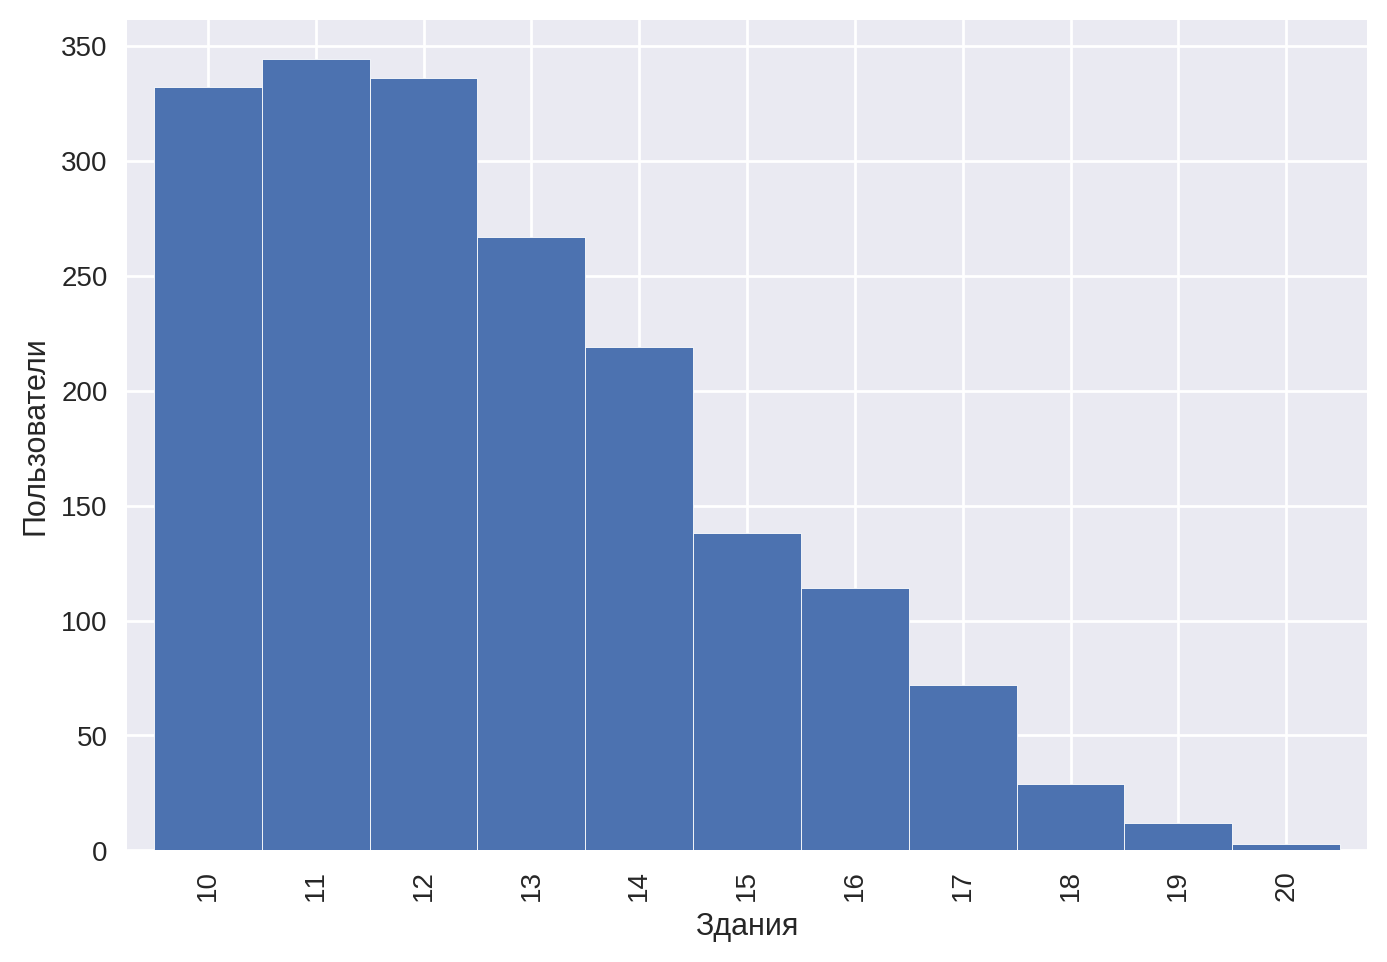

Среднее количество зданий, которое строят пользователи, завершившие игру не через проект: 8.91


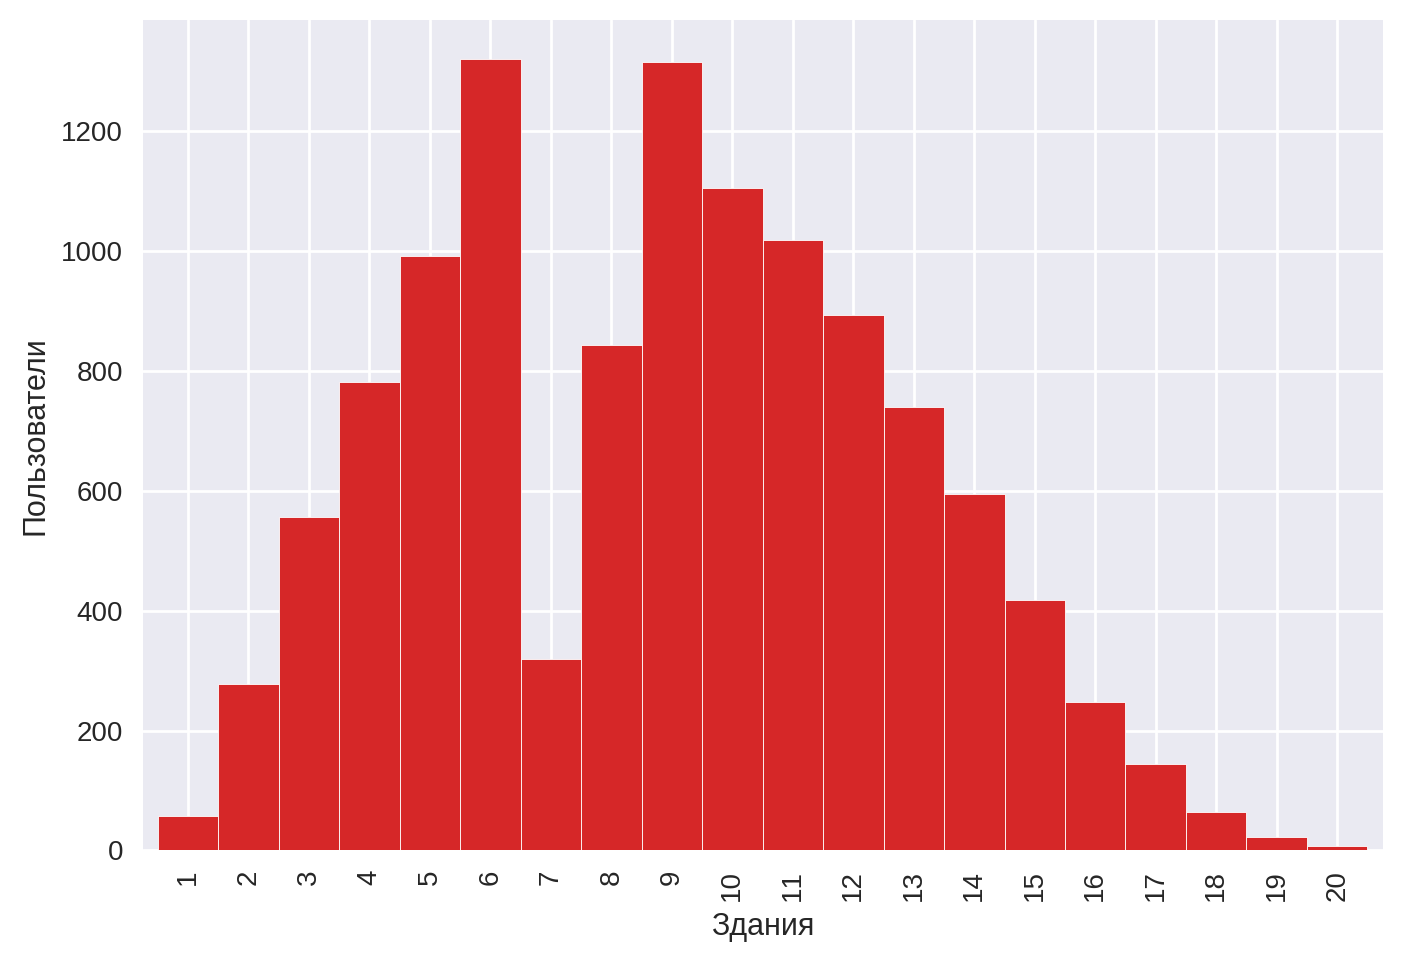

p-значение: 0.0
Отвергаем нулевую гипотезу


In [55]:
# проведем Т-тест Стьюдента
project = number_of_buildings[number_of_buildings['project_type'] == 'satellite_orbital_assembly']['event']
not_project = number_of_buildings[number_of_buildings['project_type'] != 'satellite_orbital_assembly']['event']
print(f'Среднее количество зданий, которое строят пользователи, завершившие игру через проект: {project.mean():.2f}')
with plt.style.context('seaborn'):
    number_of_buildings.query('project_type == "satellite_orbital_assembly"').groupby('event')['user_id'].count()\
    .to_frame().plot(kind='bar', stacked=True, legend = False, width=1)
    plt.xlabel('Здания')
    plt.ylabel('Пользователи')
    plt.show()
    print(f'Среднее количество зданий, которое строят пользователи, завершившие игру не через проект: {not_project.mean():.2f}')
    number_of_buildings.query('project_type != "satellite_orbital_assembly"').groupby('event')['user_id'].count()\
    .to_frame().plot(kind='bar', stacked=True, legend = False, width=1, color='tab:red')
    plt.xlabel('Здания')
    plt.ylabel('Пользователи')
    plt.show()
alpha = 0.05
results = st.ttest_ind(project, not_project, equal_var=False)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Полученное нами p-value крайне мало, потому смело отвергаем нулевую гипотезу.

## Выводы и рекомендации

**В результате исследования было выявлено следующее:**
- наибольшее количество пользователей приходит с канала yandex_direct;
- наименьшие затраты на рекламу - у youtube_channel_reklama, и у этого же источника наиболее низкая стоимость привлечения одного пользователя;
- 42.85% пользователей проходят первый уровень;
- доля игроков, которые проходят первый уровень через реализацию проекта - 32.08%;
- в среднем игрокам требуется 11-12 дней для завершения уровня;
- игроки в среднем строят 9-10 зданий;
- игроки строят research_center реже, чем остальные здания;
- 60-70% игроков не переходят на следующий уровень сразу же после завершения проекта, а продолжают строить другие здания;
- поведение игроков не отличается в зависимости от канала привлечения;
- игроки, завершающие уровень через проект, остаются на уровне дольше, чем игроки, завершающие уровень через победу на другим игроком (13 дней в среднем у первых и 11 у вторых);
- игроки, завершающие уровень через проект, строят значительно больше зданий, чем игроки, завершающие уровень через победу на другим игроком. Так, первые строят около 13 зданий в среднем, а вторые - лишь 9. Кроме того, минимальное количество зданий, требуемое для прохождения уровня через проект, равно 10, в то время как завершить уровень через победу над другим игроком можно, построив лишь одно здание.

**На основе этого, рекомендации следующие:**
- Так как разницы в поведении игроков в зависимости от канала привлечения обнаружено не было, то следует привлекать новых пользователей через самый дешевый канал - youtube_channel_reklama. Также довольно низкая стоимость привлечения у канала yandex_direct, а вот facebook_ads и instagram_new_alerts выглядят не очень выгодным вложением.
- Игроки чаще завершают уровень через победу над другим игроком, чем через завершение проекта. При этом игроки, завершающие проект, строят в среднем больше зданий. При предполагаемой модели монетизации (показ рекламы при окне выбора постройки здания), следует подумать о том, как заставить игроков завершать игру через проект. Например, можно давать дополнительные бонусы на втором уровне при прохождении игры таким способом.
- Другой вариант - это найти способ увеличить среднее количество зданий, необходимое для успешного завершения игры через победу над другим игроком. Это задача для геймдизайнера - сделать стиль "победы над другим игроком" чуть более медленным.
- Помимо этого, можно рассмотреть другие варианты монетизации. Так, можно показывать рекламу не только при постройке здания, но и при создании боевого юнита. Также можно добавить функцию "посмотри рекламу и получи бонус".
- Еще одна альтернатива: внутриигровые покупки и отказ от рекламы. Однако тут надо также задействовать геймдизайнера и отдел по балансу, чтобы удостовериться, что эта модель подходит для данной игры.